## Import the libraries

In [514]:
# data analysis and preparing
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

# preparing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier

# models
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from pomegranate import DiscreteDistribution, ConditionalProbabilityTable, State, BayesianNetwork
from sklearn.linear_model import LinearRegression, LogisticRegression

# ensembles
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier

# evaluations
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, plot_roc_curve, roc_auc_score, precision_score, recall_score, f1_score

## Read the data into a DataFrame

In [515]:
df = pd.read_csv("train_data.csv")

To see the dimensions of the data frame

In [516]:
df.shape

(318438, 18)

The output shows 318438 rows and 18 columns, which means 318438 instance with 18 features for each.

To check the first five rows of the dataframe

In [517]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


Read in and check the data descriptions

In [518]:
df_desc = pd.read_csv("train_data_dictionary.csv")
df_desc

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


Then we change the features names into a uniformed format, which could be easy for us to conduct experiments in the following sections.

In [519]:
# rename the features
df.rename(columns={'Available Extra Rooms in Hospital': 'Available_Extra_Rooms_in_Hospital',
                  'Bed Grade': 'Bed_Grade',
                  'Type of Admission': 'Type_of_Admission',
                  'Severity of Illness': 'Severity_of_Illness',
                  'Visitors with Patient': 'Visitors_with_Patient'}, inplace=True)

# Data Cleaning and Preparing

### Indentifying null values

We try to see where are the null valuse distributed in this data frame, but it seems impossible.

In [520]:
df.isna()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318436,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Try to check are there any null values in the data frame.

In [521]:
df.isnull().values.any()

True

Check the number of null values in each column (each feature)

In [522]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

Then, try to see how many mull valuse are there totally in the data frame.

In [523]:
df.isnull().sum().sum()

4645

To see the information about each column

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

### Delete rows

Check whether there are any rows can be deleted completly due to large number of null values.

Therefore, we count the number of non-null values in each row.

There are totally 18 features for each row, so if the number of non-null values in a specific row is much less than 18, we would delete it.

In [525]:
# we create a pandas series here, for each row in the data frame if it contains a null value, we will put a NaN into the series in the corresponding position
na_in_rows = df.apply(lambda x: x.count() if x.count() >= 18 else np.NaN, axis=1)

In [526]:
# count the number of rows in the dataframe that contains null values
na_in_rows.isna().sum()

4645

As we can see, there are 4645 out of 318438 rows of instance in the data frame that contain at least one NaN value.

Then we change the threshold to 17 values to see how many rows have the number of null values >= 2. 

In [527]:
na_in_rows_more_than_2 = df.apply(lambda x: x.count() if x.count() >= 17 else np.NaN, axis=1)

In [528]:
na_in_rows_more_than_2.isna().sum()

0

As we can see, there is not any row with the number of missing values more than one. Consequently, all of thoes 4645 rows with missing values in our data frame have exact one NaN value.

As a result, we do not need to delete any of the row in our data frame, because the missing values in thoes instances are not enough to affect our learning algorithm negatively.

### Delete features (Columns)

Check are there any columns contain too many null values (>30%) that is impossible to be saved by imputation.

In [529]:
df.isna().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

From the result above we can the feature "Bed Grade" and "City_Code_Patient" contain NaN values, but their numbers are much less than 30% of the total number of instances, which means we will not remove these two features due to the reason that their missing values are able to be dealt with imputation.

Check which rows has NaN value of the feature "Bed Grade"

In [530]:
df.loc[df["Bed_Grade"].isna()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
293,294,6,a,6,X,4,gynecology,Q,F,NaN,27075,15.0,Trauma,Extreme,2,21-30,4420.0,31-40
1071,1072,6,a,6,X,2,gynecology,Q,F,NaN,62491,8.0,Trauma,Extreme,4,61-70,5395.0,21-30
20379,20380,6,a,6,X,4,gynecology,Q,F,NaN,69932,2.0,Trauma,Extreme,3,41-50,5989.0,31-40
23791,23792,6,a,6,X,3,gynecology,R,F,NaN,29943,10.0,Emergency,Minor,3,31-40,4488.0,41-50
25162,25163,6,a,6,X,5,gynecology,R,F,NaN,92499,1.0,Emergency,Minor,2,71-80,4885.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234337,234338,6,a,6,X,2,radiotherapy,R,F,NaN,22881,7.0,Emergency,Minor,2,11-20,2416.0,0-10
234577,234578,6,a,6,X,2,gynecology,R,F,NaN,120677,2.0,Trauma,Extreme,4,41-50,4932.0,51-60
234895,234896,6,a,6,X,2,gynecology,R,F,NaN,111514,1.0,Trauma,Moderate,4,51-60,3984.0,11-20
235048,235049,6,a,6,X,2,gynecology,R,F,NaN,57706,2.0,Trauma,Moderate,3,41-50,4139.0,51-60


Check which rows have NaN values of feature "City_Code_Patient" 

In [531]:
df.loc[df["City_Code_Patient"].isna()]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
191,192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096.0,51-60
192,193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098.0,31-40
193,194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776.0,21-30
194,195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988.0,11-20
195,196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333.0,21-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318198,318199,23,a,6,X,2,anesthesia,Q,F,3.0,58469,NaN,Urgent,Minor,2,11-20,4432.0,11-20
318263,318264,28,b,11,X,3,anesthesia,R,F,3.0,66803,NaN,Trauma,Moderate,2,31-40,5415.0,11-20
318269,318270,26,b,2,Y,3,gynecology,R,D,4.0,95483,NaN,Trauma,Minor,5,51-60,4135.0,51-60
318271,318272,28,b,11,X,2,gynecology,R,F,4.0,117128,NaN,Emergency,Minor,2,61-70,3418.0,0-10


Check how many unique values in each column and all the distinct values of each column. 

In [532]:
def check_column_info():
    """
        Check the basic information in the dataframe of training set.
        Following info would be printed:
        1. column name
        2. are all the value in this column unique
        3. the number of ditinct values in this column
        4. distinct values 
    """
    for col in df.columns:
        print("column: {}".format(col))
        print("is unique: {}".format(df[col].is_unique))
        print("unique values: {}".format(df[col].nunique()))
        # we do not print the distinct values in the following columns
        if col not in ('case_id', 'patientid', 'Admission_Deposit'): 
            print("values: {}".format(set(df[col].values)))
        print("--- --- --- --- --- --- --- ---")

check_column_info()

column: case_id
is unique: True
unique values: 318438
--- --- --- --- --- --- --- ---
column: Hospital_code
is unique: False
unique values: 32
values: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}
--- --- --- --- --- --- --- ---
column: Hospital_type_code
is unique: False
unique values: 7
values: {'d', 'c', 'g', 'f', 'b', 'e', 'a'}
--- --- --- --- --- --- --- ---
column: City_Code_Hospital
is unique: False
unique values: 11
values: {1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13}
--- --- --- --- --- --- --- ---
column: Hospital_region_code
is unique: False
unique values: 3
values: {'X', 'Z', 'Y'}
--- --- --- --- --- --- --- ---
column: Available_Extra_Rooms_in_Hospital
is unique: False
unique values: 18
values: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 21, 24}
--- --- --- --- --- --- --- ---
column: Department
is unique: False
unique values: 5
values: {'gynecology', 'radiotherapy', 'anesthesia', 'surgery', 'TB &

#### Clean the data in "Bed_Grade" column

Imputation would be used on this column, to be specifc, we will fill in the NaN values using the value with the largest count in this column. This is because, from the output of the last cell, we can see all the possible values of this column are 1, 2, 3 and 4, which means the feature can be seen as a categorical feature. We should make sure the value used for imputation is the one among these 4.

In [533]:
# number of nan values in this column before imputation
df['Bed_Grade'].isna().sum()

113

In [534]:
# fill nan values using the mode value
df['Bed_Grade'].fillna(df['Bed_Grade'].mode(dropna=True)[0], inplace=True)

In [535]:
# number of nan values in this column after imputation
df['Bed_Grade'].isna().sum()

0

#### Clean the data in "City_Code_Patient" column

Similar with the "Bed Grade" feature, we should fill the nan values using the value with the largest count in this column as well.

In [536]:
# number of nan values in this column before imputation
df['City_Code_Patient'].isna().sum()

4532

In [537]:
# fill nan values using the value with the mode value
df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode(dropna=True)[0], inplace=True)

In [538]:
# number of nan values in this column after imputation
df['City_Code_Patient'].isna().sum()

0

Now, all the missing values in the data frame are imputed with proper values, we could check them again.

In [539]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [540]:
df.isna().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

# Feature Selection and Analysis

### Prepare data for analysis
Before analysis the features, the string values in Age and Stay features should be encode into numeric values, which can make the analysis more convenient. 

In [541]:
# define a encoding map of Age and Stay features
num_encode_age_stay = {
    'Age': {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9},
    'Stay': {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}
}

In [542]:
# replace the string values in these two features with corresponding numeric features
df.replace(num_encode_age_stay, inplace=True)

 Apart the descriptive features and target feature first.

In [543]:
# descriptive features
X = df.drop('Stay', axis=1)
X.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,5,4911.0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,5,5954.0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,5,4745.0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,5,7272.0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,5,5558.0


In [544]:
# target feature
y = df['Stay']
y.head()

0    0
1    4
2    3
3    4
4    4
Name: Stay, dtype: int64

Then we will use two different ways to encode the data:
- one-hot encoding: For logistic regression models
- numeric encoding: For all the other models

##### numeric encoding

In [545]:
# define the encode map to encode the non-ordinal categorical features into ordinal ones
num_encode = {
    'Hospital_type_code': {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6},
    'Hospital_region_code': {'X': 0, 'Y': 1, 'Z': 2},
    'Department': {'radiotherapy': 0, 'TB & Chest disease': 1, 'anesthesia': 2, 'surgery': 3, 'gynecology': 4},
    'Ward_Type': {'T': 0, 'Q': 1, 'R': 2, 'P': 3, 'S': 4, 'U': 5},
    'Ward_Facility_Code': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5},
    'Type_of_Admission': {'Emergency': 0, 'Trauma': 1, 'Urgent': 2},
    'Severity_of_Illness': {'Minor': 0, 'Moderate': 1, 'Extreme': 2}
}

In [546]:
# see the descriptive features befores encoding
X.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,5,4911.0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,5,5954.0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,5,4745.0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,5,7272.0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,5,5558.0


In [547]:
# encode the non-ordinal features
X_encoded = X.replace(num_encode)

In [548]:
# The data after numeric encoding
X_encoded.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
0,1,8,2,3,2,3,0,2,5,2.0,31397,7.0,0,2,2,5,4911.0
1,2,2,2,5,2,2,0,4,5,2.0,31397,7.0,1,2,2,5,5954.0
2,3,10,4,1,0,2,2,4,4,2.0,31397,7.0,1,2,2,5,4745.0
3,4,26,1,2,1,2,0,2,3,2.0,31397,7.0,1,2,2,5,7272.0
4,5,26,1,2,1,2,0,4,3,2.0,31397,7.0,1,2,2,5,5558.0


##### one-hot encoding
This would be done and analyzed in the "Logistic Regression Model" section

#### Normalize the features using MinMaxScaler()

In [549]:
scaler = MinMaxScaler()
X_encoded_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns, index=X_encoded.index)
X_encoded_scaled.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,0.500000,0.558672,0.209474,0.314310,0.389049,0.133234,0.840376,0.432372,0.657383,0.541862,0.499507,0.169257,0.391384,0.454231,0.102628,0.458642,0.334573
std,0.288676,0.278508,0.255952,0.258545,0.376264,0.048674,0.323289,0.229700,0.337610,0.291023,0.288551,0.127357,0.344479,0.331443,0.055127,0.209952,0.118025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.322581,0.000000,0.083333,0.000000,0.083333,1.000000,0.200000,0.400000,0.333333,0.249546,0.081081,0.000000,0.000000,0.062500,0.333333,0.259123
50%,0.500000,0.580645,0.166667,0.333333,0.500000,0.125000,1.000000,0.400000,0.800000,0.666667,0.499331,0.189189,0.500000,0.500000,0.093750,0.444444,0.319396
75%,0.750000,0.806452,0.333333,0.500000,0.500000,0.166667,1.000000,0.600000,1.000000,0.666667,0.748114,0.189189,0.500000,0.500000,0.125000,0.555556,0.391942
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Using Feature Selection Metrics
First try to figure out the most useful features for model training and prediction. To do this, we firstly use the following 4 metrics for filtering out the candidate features.
- Checking the correlation with the target feature
- Univariate selection
- Tree-based feature selection
- Using a correlation matrix

#### correlations with the target feature

In [550]:
# print the correlation table of every descriptive feature with the target feature
for col in df.columns[:-1]:
    print("--- ", col, " ---")
    print(df[[col, 'Stay']].groupby([col], as_index=False).mean().sort_values(by='Stay', ascending=False))

---  case_id  ---
        case_id  Stay
87241     87242  10.0
144451   144452  10.0
144492   144493  10.0
36123     36124  10.0
36122     36123  10.0
...         ...   ...
215998   215999   0.0
215999   216000   0.0
216030   216031   0.0
216038   216039   0.0
318437   318438   0.0

[318438 rows x 2 columns]
---  Hospital_code  ---
    Hospital_code      Stay
1               2  3.503136
21             22  3.336217
15             16  3.302642
19             20  3.262633
20             21  3.129571
28             29  3.106180
24             25  3.105145
25             26  3.068811
31             32  3.054564
0               1  3.015241
17             18  2.948760
27             28  2.798915
8               9  2.787142
22             23  2.758714
29             30  2.647341
5               6  2.612729
13             14  2.568906
4               5  2.508078
11             12  2.505001
10             11  2.499250
14             15  2.490332
7               8  2.481845
9              10  2.46

According to the correlation tables above, the following features have good correlation with the target feature "Stay":
- Severity_of_Illness
- Visitors_with_Patient
- Age

#### Univariate selection

In [551]:
# Use the entire dataset to select the best features. (X_encoded: descriptive, y: target features)
best_features = SelectKBest(score_func=f_classif, k=7).fit(X_encoded, y)

dfscores = pd.DataFrame(best_features.scores_)         # score for each feature
dfcolumns = pd.DataFrame(X_encoded.columns)            # name of each feature

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns

# print the result
print(featureScores.nlargest(10,'Score'))

                             Features         Score
14              Visitors_with_Patient  15972.980814
7                           Ward_Type   1715.130969
5   Available_Extra_Rooms_in_Hospital    706.447486
13                Severity_of_Illness    637.485189
16                  Admission_Deposit    468.224070
9                           Bed_Grade    443.002824
12                  Type_of_Admission    324.083359
15                                Age    297.119420
0                             case_id    193.875749
2                  Hospital_type_code    167.998928


#### Tree-based feature selection

<AxesSubplot:>

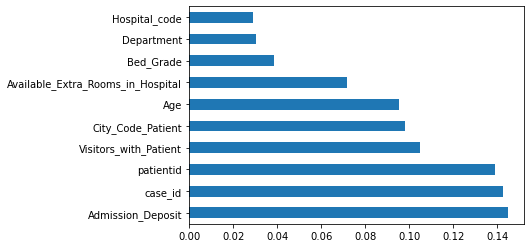

In [552]:
tree = ExtraTreesClassifier()
tree.fit(X_encoded, y)

df_feature_importances = pd.Series(tree.feature_importances_, index=X_encoded.columns)
df_feature_importances.nlargest(10).plot(kind='barh')

#### Using a correlation matrix

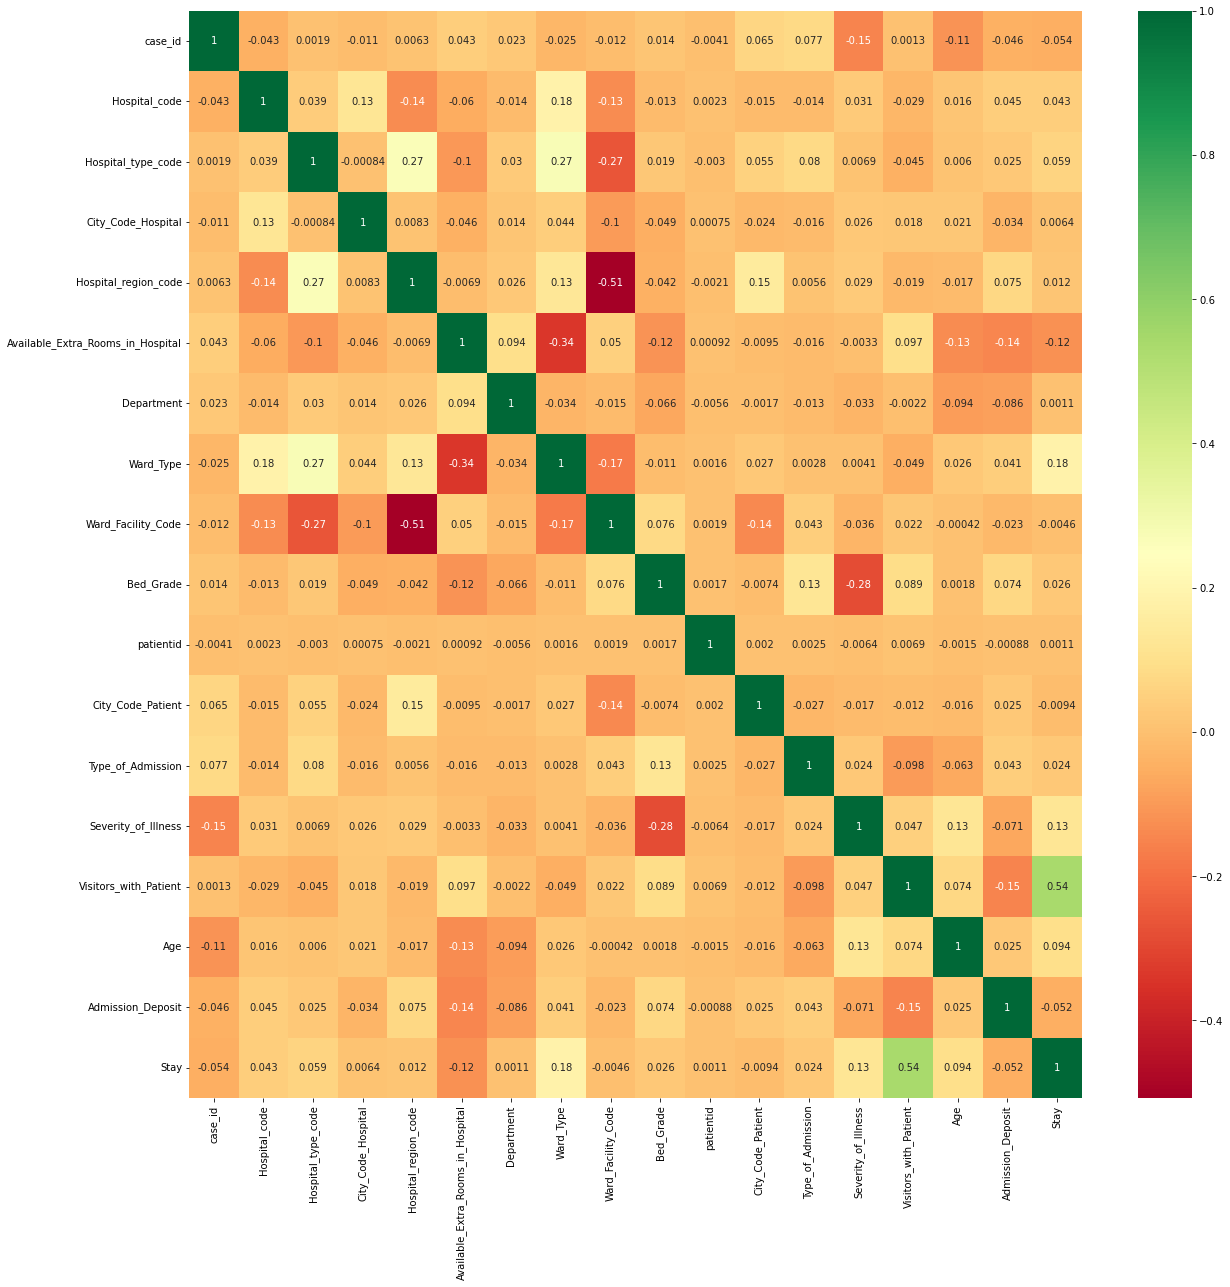

In [553]:
corr_mat = pd.concat([X_encoded, y], axis=1).corr()

plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat, annot=True, cmap="RdYlGn")

As all the results above show, the following features might be useful for our model training, and we will analyze more details mainly based on these features.
- Visitors_with_Patient
- Severity_of_Illness
- Age
- Ward_Type
- Admission_Deposit

### Analyze features in detail

Plot the relationship between the **Visitors_with_Patient** feature with the target feature

<AxesSubplot:xlabel='Visitors_with_Patient', ylabel='Stay'>

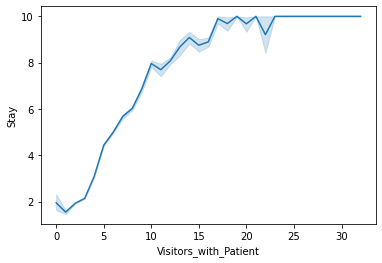

In [554]:
sns.lineplot(x='Visitors_with_Patient', y='Stay', data=df)

Plot the relationship between the **Severity_of_Illness** feature with the target feature

<AxesSubplot:xlabel='Severity_of_Illness', ylabel='Stay'>

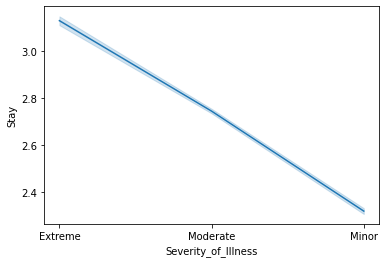

In [555]:
sns.lineplot(x='Severity_of_Illness', y='Stay', data=df)

Plot the relationship between the **Age** feature with the target feature

<AxesSubplot:xlabel='Age', ylabel='Stay'>

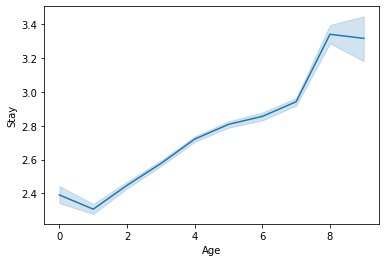

In [556]:
sns.lineplot(x='Age', y='Stay', data=df)

Observation:
- The more visitors of a patient, the longer the patient may Stay.
- The severer the patient is, the longer the patient may stay.
- The elder the patient is, the longer the patient may stay.

Consequently, these 3 features can be helpful when predicting the length of stay.

We will analyze some more other features apart from these 5 candidate features. '**Ward_Type**' feature would be analyzed with other features and '**Admission_Deposit**' feature would be analyzed in the 'Creating new features' section.

Analyze the **Bed_Grade** feature. Plot the relation between Severity_of_Illness, Ward_Type, Stay, and Bed_Grade.

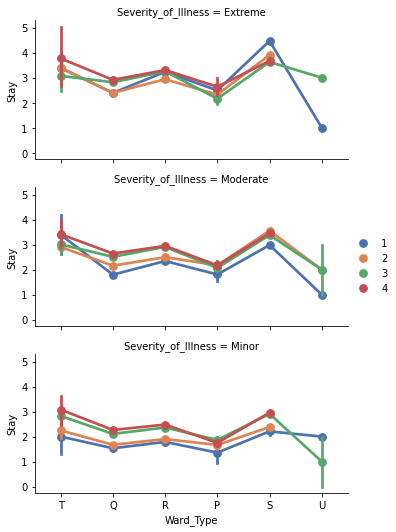

In [557]:
# Bed_Grade: 1, 2, 3, 4
grid = sns.FacetGrid(df, row='Severity_of_Illness', height=2.5, aspect=2.0)
grid.map(sns.pointplot, 'Ward_Type', 'Stay', 'Bed_Grade', order=['T', 'Q', 'R', 'P', 'S', 'U'], hue_order=[1, 2, 3, 4], palette='deep')
grid.add_legend()

Observation:
- Patients with 'Extreme' and 'Minor' illness in 'U' type wards only use the beds with grade of 1 and 3.
- Patients with 'Moderate' illness in 'U' type wards only use the beds with grade of 1, 2 and 3.
- Most of the time, patients with bed of grade 4 stay longer than others, while the ones with bed of grade 1 stay shorter than others.

Therefore, '**Bed_Grade**' feature can be good for prediction.

Analyze the **Hospital_region_code** feature. Plot the relation between Severity_of_Illness, Ward_Type, Stay, and Hospital_region_code.

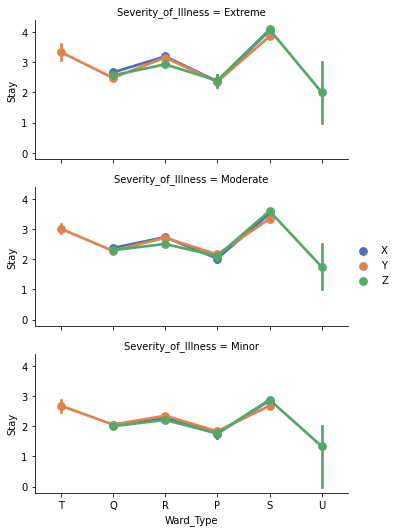

In [558]:
# Hospital_region_code: X, Y, Z
grid = sns.FacetGrid(df, row='Severity_of_Illness', height=2.5, aspect=2.0)
grid.map(sns.pointplot, 'Ward_Type', 'Stay', 'Hospital_region_code', order=['T', 'Q', 'R', 'P', 'S', 'U'], hue_order=['X', 'Y', 'Z'], palette='deep')
grid.add_legend()

Observation:
- Hospitals in region 'X' do not have the wards of type 'T' and 'U'
- Hospitals in region 'Y' do not have 'U' type wards.
- Hospitals in region 'Z' do not have 'T' type wards.
- Less deference in length of stay between different Hospital_region_code as the three lines overlapped most of the time.

Therefore, '**Hospital_region_code**' may not useful for prediction.

Analyze the **Type_of_Admission** feature. Plot the relation between Severity_of_Illness, Ward_Type, Stay, and Type_of_Admission.

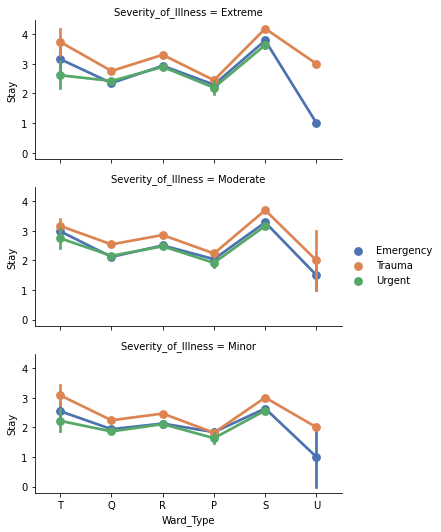

In [559]:
# Type of Admission: Emergency, Trauma, Urgent
grid = sns.FacetGrid(df, row='Severity_of_Illness', height=2.5, aspect=2.0)
grid.map(sns.pointplot, 'Ward_Type', 'Stay', 'Type_of_Admission', order=['T', 'Q', 'R', 'P', 'S', 'U'], hue_order=['Emergency', 'Trauma', 'Urgent'], palette='deep')
grid.add_legend()

Observations:
- No patients with 'Urgent' type admissions living in the 'U' type wards.
- Patients with 'Trauma' type admission usually stay longer than others.
- Patients with 'Emergency' and 'Urgent' types admission usually have similar length of stay.

Therefore, '**Type_of_Admission**' feature is still good for predicting, and we can derive a new feature from it to minimize the redundancy of feature levels. This would be tried in the 'creating new features' section. 

From the above 3 groups of grid plots, we can see the **Ward_Type** feature has strong correlation with our target feature 'Stay'. Specifically, in all of the cases shown above, the length of stay in each type of the wards shows an stable relative relationship with the stay of other types. For example, most of the time, T>Q, Q<R, R>P, P<S, S>U. Therefore, Ward_Type can be good for our prediction.

# Creating new features

##### isTrauma from Type_of_Admission

As can be seen from the plot above, the 'Stay' of Type_of_Admission=Trauma is aways higher than the 'Stay' of Type_of_Admission=Emergency and Type_of_Admission=Urgent. Moreover, the Emergency and the Urgent type of admissions have similar length of stay most of the time. Therefore, we are going to derive a new feature from 'Type_of_Admission' only representing whether the Type of Admission is Trauma. This might be a good feature for our model training.

In [560]:
# create a new feature 'isTrauma'
df['isTrauma'] = df.Type_of_Admission == 'Trauma'
df['isTrauma'].head()

0    False
1     True
2     True
3     True
4     True
Name: isTrauma, dtype: bool

##### Deposit_Band from Admission_Deposit

Now, move onto the feature **Admission_Deposit**

<AxesSubplot:xlabel='Stay', ylabel='Admission_Deposit'>

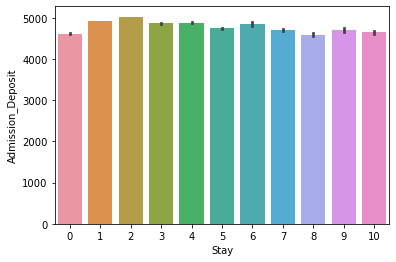

In [561]:
sns.barplot(x='Stay', y='Admission_Deposit', data=df)

Create Deposit_Band feature using quartile values

In [562]:
df['Deposit_Band'] = pd.qcut(df['Admission_Deposit'], 4)
df[['Deposit_Band', 'Stay']].groupby(['Deposit_Band'], as_index=False).mean().sort_values(by='Deposit_Band', ascending=True)

,Deposit_Band,Stay
0,"(1799.999, 4186.0]",3.104882
1,"(4186.0, 4741.0]",2.603220
2,"(4741.0, 5409.0]",2.446766
3,"(5409.0, 11008.0]",2.639244


From the plot above, we can see that there is no obvious difference between the average admission deposit of the patients of different length of stay. Therefore, the feature "Admission_Deposit" might be not that useful for the prediction. Furthermore, as the table above shows, the newly created feature "Deposit_Band" may also not useful for prediction. 

In [563]:
# drop the derived feature "Deposit_Band"
df.drop('Deposit_Band', axis=1, inplace=True)

##### Age_Band from Age

The Age feature has already been encoded into the numeric values (0, 1, 2, ..., 9) so far, but there are too many levels in this categorical feature. However, creating a new feature Age_Band can minimize its categories.

In [564]:
df['Age_Band'] = pd.cut(df['Age'], bins=[-1,1,3,6,9], labels=['Child','The_yong','Middle_Aged','Elderly'])
df[['Age_Band', 'Stay']].groupby(['Age_Band'], as_index=False).mean().sort_values(by='Age_Band', ascending=True)

,Age_Band,Stay
0,Child,2.329641
1,The_yong,2.526004
2,Middle_Aged,2.780576
3,Elderly,3.021986


From the table we can observe that the elder the patient is, the longer they may stay in the hospital. Therefore, Age and Age_Band might be useful features for prediction.

In [565]:
# change the labels of Age_Band feature into numeric values
df.drop('Age_Band', axis=1, inplace=True)
df['Age_Band'] = pd.cut(df['Age'], bins=[-1,1,3,6,9], labels=[0, 1, 2, 3])

In [566]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,isTrauma,Age_Band
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,5,4911.0,0,False,2
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,5,5954.0,4,True,2
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,5,4745.0,3,True,2
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,5,7272.0,4,True,2
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,5,5558.0,4,True,2


##### is_local from City_Code_Hospital and City_Code_Patient

Plot the relationship between **City_Code_Hospital** and our target feature.

<AxesSubplot:xlabel='City_Code_Hospital', ylabel='Stay'>

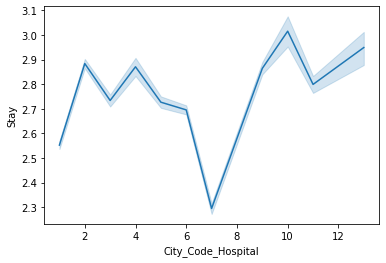

In [567]:
sns.lineplot(x='City_Code_Hospital', y='Stay', data=df)

Plot the relationship between **City_Code_Patient** and our target feature.

<AxesSubplot:xlabel='City_Code_Patient', ylabel='Stay'>

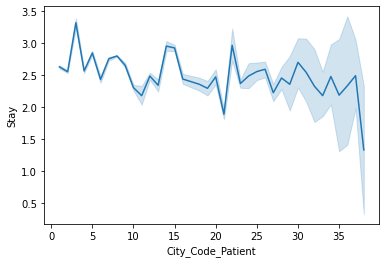

In [568]:
sns.lineplot(x='City_Code_Patient', y='Stay', data=df)

As can be seen from the plots above, City_Code_Hospital and City_Code_Patient features do **not** have strong correlation with the target feature, which means they may not that useful for our prediction. 

However, one striking relation between these two features is that the city codes of them refer to the same set of cities, therefore, we are able to map the city of the patient with the city of the hospital they are staying at using these codes. As a result, we can determine whether the patient is local by deriving a new feature called **is_Local**. Specifically, this feature has only two categories:

  - True: if the patient has the same city code with the hospital
  - False: if the patient has the different city code with the hospital
    
As we analyzed before, there are 37 and 11 categories for City_Code_Patient and City_Code_Hospital features respectively. The advent of is_Local feature also minimize the complexity of features.

In [569]:
# create a new feature 'is_Local'
df['is_Local'] = df['City_Code_Patient'] == df['City_Code_Hospital']

In [570]:
df.loc[df.is_Local == True][['is_Local', 'City_Code_Patient', 'City_Code_Hospital']].head()

,is_Local,City_Code_Patient,City_Code_Hospital
26,True,2.0,2
27,True,2.0,2
39,True,7.0,7
46,True,2.0,2
52,True,2.0,2


In [571]:
df.loc[df.is_Local == False][['is_Local', 'City_Code_Patient', 'City_Code_Hospital']].head()

,is_Local,City_Code_Patient,City_Code_Hospital
0,False,7.0,3
1,False,7.0,5
2,False,7.0,1
3,False,7.0,2
4,False,7.0,2


In conclusion, so far, the good features we selected are:
- Visitors_with_Patient
- Severity_of_Illness
- Age
- Ward_Type
- Bed_Grade
- isTrauma (self-created)
- Age_Band (self-created)
- is_Local (self-created)

#### We should do the following processes again for the newly created features.

 Apart the descriptive features and target feature.

In [572]:
# descriptive features
X = df.drop('Stay', axis=1)
X.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,isTrauma,Age_Band,is_Local
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,5,4911.0,False,2,False
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,5,5954.0,True,2,False
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,5,4745.0,True,2,False
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,5,7272.0,True,2,False
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,5,5558.0,True,2,False


In [573]:
# target feature
y = df['Stay']
y.head()

0    0
1    4
2    3
3    4
4    4
Name: Stay, dtype: int64

Then we encode the newly created features into numeric data

In [574]:
# define the encode map to encode the non-ordinal categorical features into ordinal ones
num_encode_new_features = {    
    'Hospital_type_code': {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6},
    'Hospital_region_code': {'X': 0, 'Y': 1, 'Z': 2},
    'Department': {'radiotherapy': 0, 'TB & Chest disease': 1, 'anesthesia': 2, 'surgery': 3, 'gynecology': 4},
    'Ward_Type': {'T': 0, 'Q': 1, 'R': 2, 'P': 3, 'S': 4, 'U': 5},
    'Ward_Facility_Code': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5},
    'Type_of_Admission': {'Emergency': 0, 'Trauma': 1, 'Urgent': 2},
    'Severity_of_Illness': {'Minor': 0, 'Moderate': 1, 'Extreme': 2},
    
    'isTrauma': {True: 1, False: 0},
    'is_Local': {True: 1, False: 0}
}

In [575]:
# see the descriptive features befores encoding
X.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,isTrauma,Age_Band,is_Local
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,5,4911.0,False,2,False
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,5,5954.0,True,2,False
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,5,4745.0,True,2,False
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,5,7272.0,True,2,False
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,5,5558.0,True,2,False


In [576]:
# encode the non-ordinal features
X_encoded = X.replace(num_encode_new_features)

In [577]:
# The data after numeric encoding
X_encoded.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,isTrauma,Age_Band,is_Local
0,1,8,2,3,2,3,0,2,5,2.0,31397,7.0,0,2,2,5,4911.0,0,2,0
1,2,2,2,5,2,2,0,4,5,2.0,31397,7.0,1,2,2,5,5954.0,1,2,0
2,3,10,4,1,0,2,2,4,4,2.0,31397,7.0,1,2,2,5,4745.0,1,2,0
3,4,26,1,2,1,2,0,2,3,2.0,31397,7.0,1,2,2,5,7272.0,1,2,0
4,5,26,1,2,1,2,0,4,3,2.0,31397,7.0,1,2,2,5,5558.0,1,2,0


#### Normalize the newly created features using MinMaxScaler()

In [578]:
scaler = MinMaxScaler()
X_encoded_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X_encoded.columns, index=X_encoded.index)
X_encoded_scaled.describe()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,isTrauma,Age_Band,is_Local
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,0.500000,0.558672,0.209474,0.314310,0.389049,0.133234,0.840376,0.432372,0.657383,0.541862,0.499507,0.169257,0.391384,0.454231,0.102628,0.458642,0.334573,0.478150,0.556188,0.073807
std,0.288676,0.278508,0.255952,0.258545,0.376264,0.048674,0.323289,0.229700,0.337610,0.291023,0.288551,0.127357,0.344479,0.331443,0.055127,0.209952,0.118025,0.499523,0.268475,0.261457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.322581,0.000000,0.083333,0.000000,0.083333,1.000000,0.200000,0.400000,0.333333,0.249546,0.081081,0.000000,0.000000,0.062500,0.333333,0.259123,0.000000,0.333333,0.000000
50%,0.500000,0.580645,0.166667,0.333333,0.500000,0.125000,1.000000,0.400000,0.800000,0.666667,0.499331,0.189189,0.500000,0.500000,0.093750,0.444444,0.319396,0.000000,0.666667,0.000000
75%,0.750000,0.806452,0.333333,0.500000,0.500000,0.166667,1.000000,0.600000,1.000000,0.666667,0.748114,0.189189,0.500000,0.500000,0.125000,0.555556,0.391942,1.000000,0.666667,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling
In this section, we are going to train several machine learning models using our datasets. For each model, we will tune the hyperparameters of it to find the combination that gives the highest performance. On top of that, we will try several different ways to split the training and validation data for each model, then find out a training-validation ratio that is suitable for this model.

The models going to be used are:
- Decision Tree
- KNN
- Gaussian Naive Bayes
- Logistic Regression

The main reason for trying these models is that they are suitable for training with categorical features and predicting a categorical target. Furthermore, our target feature is a categorical feature, and most of our descriptive features are also categorical or discrete features. 

#### Dataset Division
Before modeling, we split the whole data set into **(training + validation) set** and **testing set**.

We set a random state here to make sure when splitting the data encoded by one-hot encoding we can get the same testing set.

In [579]:
# data set --> (train + validate) + test
X_train_val_encoded_scaled, X_test, y_train_val, y_test = train_test_split(X_encoded_scaled, y, test_size=0.3, random_state=27)

## Decision Tree
First model we are going to use is decision tree. We have already encoded the non-ordinal categorical features into ordinal ones for using the decision tree.

##### split the training and validation set (70% train, 30% validation)

In [581]:
# split the training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.3)
combine = [X_train, X_val]

#### Tree 1
Use all the descriptive features

In [582]:
# tree 1: use all the descriptive features
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.18      0.18      0.18      4964
           1       0.35      0.34      0.34     16484
           2       0.38      0.37      0.38     18319
           3       0.24      0.25      0.24     11619
           4       0.06      0.06      0.06      2452
           5       0.31      0.31      0.31      7415
           6       0.03      0.03      0.03       590
           7       0.13      0.13      0.13      2090
           8       0.20      0.22      0.21      1015
           9       0.07      0.09      0.08       525
          10       0.35      0.37      0.36      1399

    accuracy                           0.29     66872
   macro avg       0.21      0.21      0.21     66872
weighted avg       0.30      0.29      0.30     66872



##### Tree 2
use only the categorical descriptive features

In [583]:
# create new training and validation sets with only the categorical features
X_train2 = X_train.drop(['case_id', 'Available_Extra_Rooms_in_Hospital', 'patientid', 'Visitors_with_Patient', 'Age'], axis=1)
X_val2 = X_val.drop(['case_id', 'Available_Extra_Rooms_in_Hospital', 'patientid', 'Visitors_with_Patient', 'Age'], axis=1)

In [584]:
# tree 2: use only the categorical descriptive features
tree2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree2.fit(X_train2, y_train)
y_pred = tree2.predict(X_val2)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.14      0.14      4964
           1       0.30      0.29      0.29     16484
           2       0.33      0.33      0.33     18319
           3       0.19      0.19      0.19     11619
           4       0.06      0.06      0.06      2452
           5       0.15      0.15      0.15      7415
           6       0.02      0.02      0.02       590
           7       0.06      0.07      0.06      2090
           8       0.04      0.05      0.04      1015
           9       0.01      0.01      0.01       525
          10       0.09      0.09      0.09      1399

    accuracy                           0.23     66872
   macro avg       0.12      0.13      0.13     66872
weighted avg       0.23      0.23      0.23     66872



##### Tree 3
use the good features we have selected before 

- Visitors_with_Patient
- Severity_of_Illness
- Age
- Ward_Type
- Bed_Grade
- isTrauma (self-created)
- Age_Band (self-created)
- is_Local (self-created)

In [493]:
# create new training and validation sets with the selected good features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] # 0.38926606053355667

X_train3 = X_train[selected_features]
X_val3 = X_val[selected_features]

In [494]:
# tree 3: use the selected good features
tree3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree3.fit(X_train3, y_train)
y_pred = tree3.predict(X_val3)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.22      0.02      0.04      4973
           1       0.36      0.51      0.43     16367
           2       0.40      0.58      0.47     18236
           3       0.37      0.21      0.27     11705
           4       0.05      0.00      0.00      2419
           5       0.38      0.45      0.41      7347
           6       0.06      0.00      0.01       605
           7       0.25      0.03      0.06      2135
           8       0.31      0.15      0.20      1066
           9       0.37      0.05      0.08       575
          10       0.54      0.29      0.37      1444

    accuracy                           0.38     66872
   macro avg       0.30      0.21      0.21     66872
weighted avg       0.35      0.38      0.34     66872



#### Tuning hyperparameters
We are going to change the following hyperparameters to find out the combination that gives the highest performance.
- criterion: 'entropy', 'gini'
- max_depth: range from 1 to 20

In [41]:
accuracy_entropy = []
accuracy_gini = []

criterions = ['entropy', 'gini']

# calculate the accuracy scores for decision tree models using different combination of criterion and max_depth
for criterion in criterions:
    for max_dep in range(1, 21):

        # create a new model using this combination of hyperparameter
        tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_dep, random_state=42)
        tree.fit(X_train3, y_train)
        y_pred = tree.predict(X_val3)

        # recorde the accuracy of this model 
        if criterion == 'entropy':
            accuracy_entropy.append(accuracy_score(y_val, y_pred))
        elif criterion == 'gini':
            accuracy_gini.append(accuracy_score(y_val, y_pred))


plot the accuracy of models we trained with different hyperparameter combinations

Text(0, 0.5, 'Accuracy')

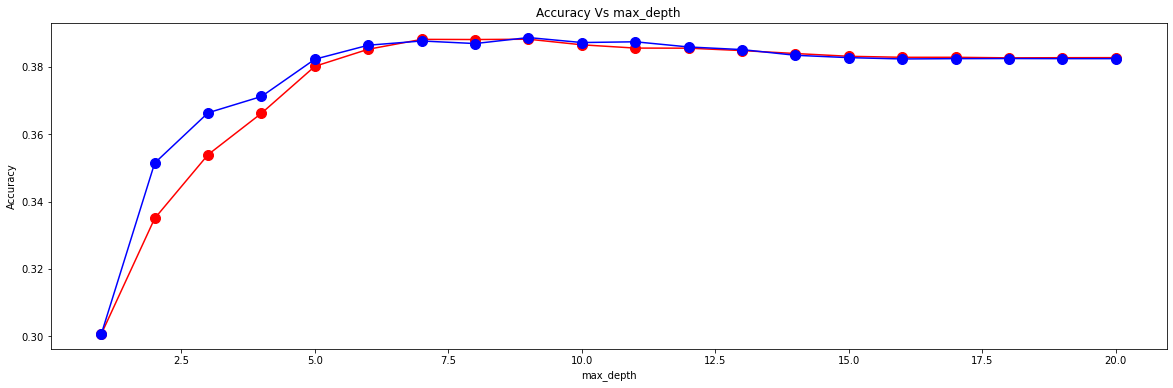

In [42]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 21), accuracy_entropy, color='red', marker='o', markersize=10)
plt.plot(range(1, 21), accuracy_gini, color='blue', marker='o', markersize=10)
plt.title('Accuracy Vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [43]:
print(max([max(accuracy_entropy), max(accuracy_gini)]))

0.3887127646847709


As can be seen from the results, when using the 'entropy' as the criterion and set the max_depth as 8, we got the decision tree model with the highest performance, which has the prediction accuracy of 0.387

##### Train another model using different split ratio
We will train another decision tree model using the same combination of hyperparameters (criterion:'entropy', max_depth: 8), but using different ratio to split the data set, which would be {60% training, 40% validation}.

In [44]:
# split the training and validation set (60 : 40)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.4)
combine = [X_train, X_val]

# using the same set of selected features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] # 0.38926606053355667
X_train4 = X_train[selected_features]
X_val4 = X_val[selected_features]

In [45]:
# train another model still using entropy as criterion and using 8 as max_depth
tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.14      0.20      6578
           1       0.40      0.50      0.44     21958
           2       0.41      0.61      0.49     24396
           3       0.38      0.26      0.31     15427
           4       0.06      0.00      0.00      3302
           5       0.40      0.41      0.41      9759
           6       0.00      0.00      0.00       795
           7       0.37      0.01      0.01      2854
           8       0.33      0.12      0.17      1359
           9       0.00      0.00      0.00       801
          10       0.53      0.37      0.44      1934

    accuracy                           0.40     89163
   macro avg       0.29      0.22      0.23     89163
weighted avg       0.38      0.40      0.37     89163



D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the result, we can observe that the accuracy is increased from 0.387 to 0.40 when using 60% data for training and 40% for validation.

### Test more ways for dividing dataset
We will find out the highest performance of decision tree models when using the following training-testing ratio: 1:9, 2:8, 3:7, ..., 9:1


In [46]:
highest_accuracy = []

# length=9, (index/10) referes to the percentage of validation set
accuracy_max_lst = []
criterion_max_lst = []
depth_max_lst = []


for test_size in range(1, 10):
    
    accuracy_max = 0
    criterion_max = ''
    depth_max = 0

    # split the dataset
    X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=test_size/10)
    
    # using the same set of selected features
    selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] # 0.38926606053355667
    X_train5 = X_train[selected_features]
    X_val5 = X_val[selected_features]
    
    """try different combinations of hyperparameters"""
    accuracy_entropy = []
    accuracy_gini = []

    criterions = ['entropy', 'gini']

    # calculate the accuracy scores for decision tree models using different combination of criterion and max_depth
    for criterion in criterions:
        for max_dep in range(1, 21):

            # create a new model using this combination of hyperparameter
            tree = DecisionTreeClassifier(criterion=criterion, max_depth=max_dep, random_state=42)
            tree.fit(X_train5, y_train)
            y_pred = tree.predict(X_val5)

            # recorde the accuracy of this model 
            if criterion == 'entropy':
                accuracy_entropy.append(accuracy_score(y_val, y_pred))
                
            elif criterion == 'gini':
                accuracy_gini.append(accuracy_score(y_val, y_pred))
            
            # update the info of highest performance setting
            if accuracy_score(y_val, y_pred) > accuracy_max:
                accuracy_max = accuracy_score(y_val, y_pred)
                criterion_max = criterion
                depth_max = max_dep
            
            
    accuracy_max_lst.append(accuracy_max)
    criterion_max_lst.append(criterion_max)
    depth_max_lst.append(depth_max)

    # record the highest accuracy
    highest_accuracy.append(max([max(accuracy_entropy), max(accuracy_gini)]))
    
    

Plot the relationship between training-testing ratio and highest possible accuracy

Text(0, 0.5, 'Accuracy')

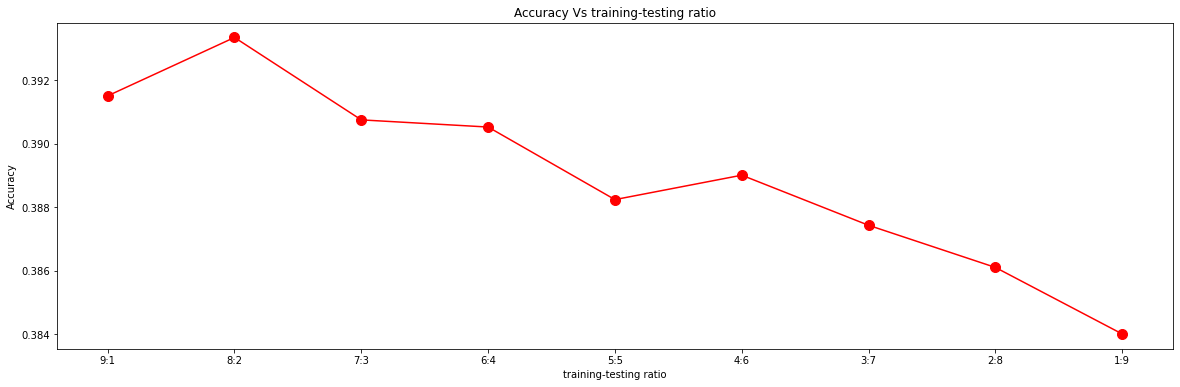

In [47]:
plt.figure(figsize=(20, 6))
plt.plot(['9:1', '8:2', '7:3', '6:4', '5:5', '4:6', '3:7', '2:8', '1:9'], highest_accuracy, color='red', marker='o', markersize=10)
plt.title('Accuracy Vs training-testing ratio')
plt.xlabel('training-testing ratio')
plt.ylabel('Accuracy')

In [48]:
for i in range(9):
    print("traing set: {}%, highest accuracy: {}, criterion: {}, max_depth: {}".format((10-(i+1))*10, accuracy_max_lst[i], criterion_max_lst[i], depth_max_lst[i]))

traing set: 90%, highest accuracy: 0.3915032972948724, criterion: entropy, max_depth: 9
traing set: 80%, highest accuracy: 0.3933426046386434, criterion: entropy, max_depth: 9
traing set: 70%, highest accuracy: 0.390746500777605, criterion: entropy, max_depth: 8
traing set: 60%, highest accuracy: 0.3905207316936397, criterion: entropy, max_depth: 8
traing set: 50%, highest accuracy: 0.38823539967519943, criterion: entropy, max_depth: 9
traing set: 40%, highest accuracy: 0.38900436655102283, criterion: entropy, max_depth: 7
traing set: 30%, highest accuracy: 0.3874258980356971, criterion: entropy, max_depth: 7
traing set: 20%, highest accuracy: 0.3860984158138231, criterion: gini, max_depth: 9
traing set: 10%, highest accuracy: 0.38400227299916256, criterion: gini, max_depth: 8


Therefore, the best combination of hyperparameters and data division is:
- criterion=entropy, max_depth=9, {80% training, 20% validation} 

## KNN
Our data has already been normalized using MinMaxScaler() 

In [49]:
# split the dataset (use 30% training set for our first KNN model)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.3)
    
# using the set of selected good features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] # 0.38926606053355667
X_train = X_train[selected_features]
X_val = X_val[selected_features]

### KNN model 1
It is said that 5 is the most commonly used value for K in the KNN model, so we start with k=5

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

print("Accuracy for model k=5: ", accuracy_score(y_val, y_pred))

Accuracy for model k=5:  0.31976013877258047


### Tuning hyperparameters
The hyprtparameters we will adjust for training different KNN models are:
- k (n_neighbors): from 1 to 60
- p: 1, 2
- weights: ‘uniform’, ‘distance’

Firstly, we will keep the weights as 'uniform' and compare the different combinations of k and p parameters. Therefore we can identify the best k value when using different distance calculating algorithms.

#### P=2 (using euclidean_distance)
Train 60 KNN models with k values from 1 to 60 

In [52]:
accuracy_p2 = []

# Calculating the accuracy of knn models with K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='uniform')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    accuracy_p2.append(accuracy_score(y_val, pred_i))
    

#### P=1 (using manhattan_distance)
Train 60 KNN models with k values from 1 to 60

In [53]:
accuracy_p1 = []

# Calculating the accuracy of knn models with K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=1, weights='uniform')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    accuracy_p1.append(accuracy_score(y_val, pred_i))

Use two lists of accuracy scores to plot a figure to show the relationship between accuracy and k values. Two lines would be shown. One represents the accuracy of that 60 models using euclidean_distance, the other is the ones using manhattan_distance.

Text(0, 0.5, 'Accuracy')

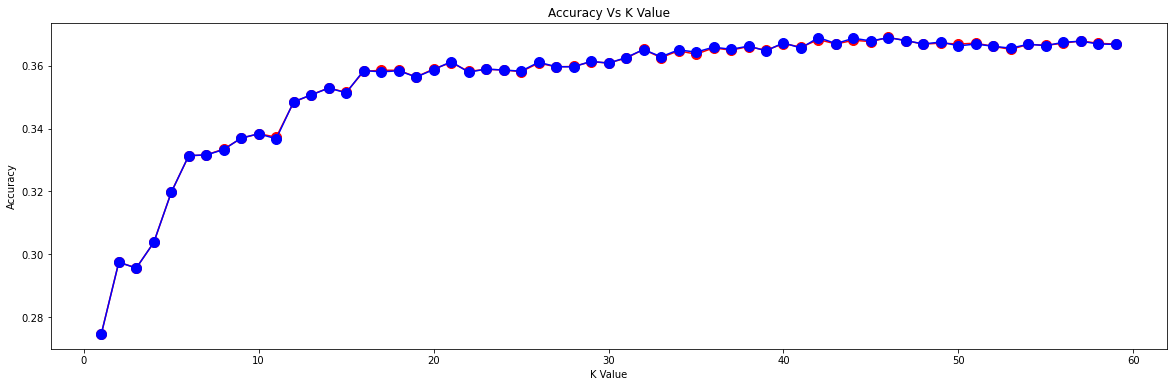

In [54]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy_p2, color='red', marker='o', markersize=10)
plt.plot(range(1, 60), accuracy_p1, color='blue', marker='o', markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

Observations:
- Blue and red line are overlapped, which means there is almost no differences on accuracy when using Manhattan distance and Euclidean distance.
- The highest accuracy is gotten when using k=42

Apart from that, we will keep the parameter p as default (p=2), which is euclidean_distance, then compare the different combinations of k and weights parameters. Therefore we can identify the best k value when using different weighting methods.

#### weights='uniform'
Train 60 KNN models with k values from 1 to 60 

In [55]:
accuracy_w_uniform = []

# Calculating the accuracy of knn models with K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='uniform')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    accuracy_w_uniform.append(accuracy_score(y_val, pred_i))

#### weights='distance'
Train 60 KNN models with k values from 1 to 60 

In [56]:
accuracy_w_distance = []

# Calculating the accuracy of knn models with K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    accuracy_w_distance.append(accuracy_score(y_val, pred_i))

Plot the relationship between k values and accuracies we just calculated. The red line represents the model using uniformed weights, while the blue line represents the model, which weights points by the inverse of their distance.

Text(0, 0.5, 'Accuracy')

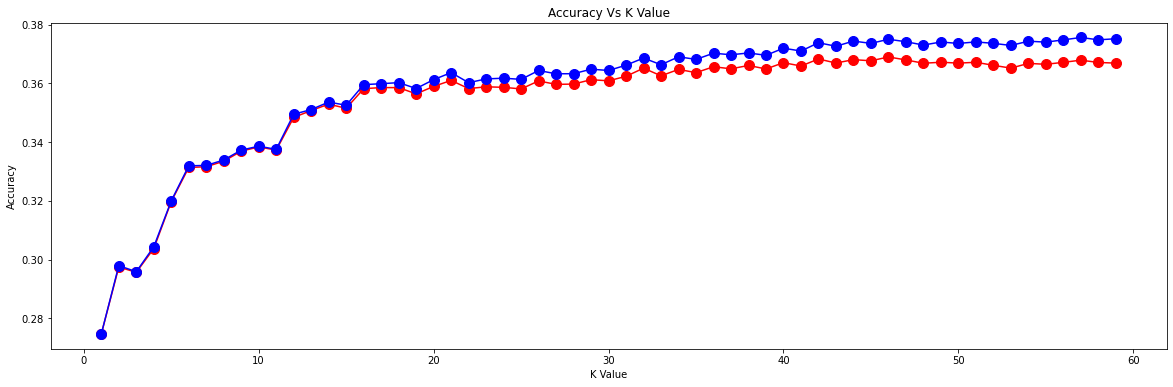

In [57]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy_w_uniform, color='red', marker='o', markersize=10)
plt.plot(range(1, 60), accuracy_w_distance, color='blue', marker='o', markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

Observations:
- If using k < 17, there is no obvious differences between weighting points by the inverse of their distance or not
- If using k > 17, after weighting points by the inverse of their distance, the accuracy would be higher (blue line is generally higher than red).
- When weighting points by the inverse of their distance (weights='distance') and using k=46, the highest accuracy is gotten.

### Using different training-testing ratio
For all the experiments above, we have split 70% of the data into training set, and 30% into validation set. Now, we are going to test the performance of KNN models using less training data, which means splitting 50% of the data into training set, and 50% into validation set this time.

In [58]:
# split the dataset (50% training, 50% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.5)
    
# using the set of selected good features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] # 0.38926606053355667
X_train = X_train[selected_features]
X_val = X_val[selected_features]

Then repeat the experiments above using this new ratio of training and testing datasets

#### P=2 (using euclidean_distance)
Train 60 KNN models with k values from 1 to 60 

In [59]:
accuracy_p2 = []

# Calculating the accuracy of knn models with K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='uniform')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    accuracy_p2.append(accuracy_score(y_val, pred_i))
    

#### P=1 (using manhattan_distance)
Train 60 KNN models with k values from 1 to 60

In [60]:
accuracy_p1 = []

# Calculating the accuracy of knn models with K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=1, weights='uniform')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    accuracy_p1.append(accuracy_score(y_val, pred_i))

Use two lists of accuracy scores to plot a figure to show the relationship between accuracy and k values. Two lines would be shown. One represents the accuracy of that 60 models using euclidean_distance, the other is the ones using manhattan_distance.

Text(0, 0.5, 'Accuracy')

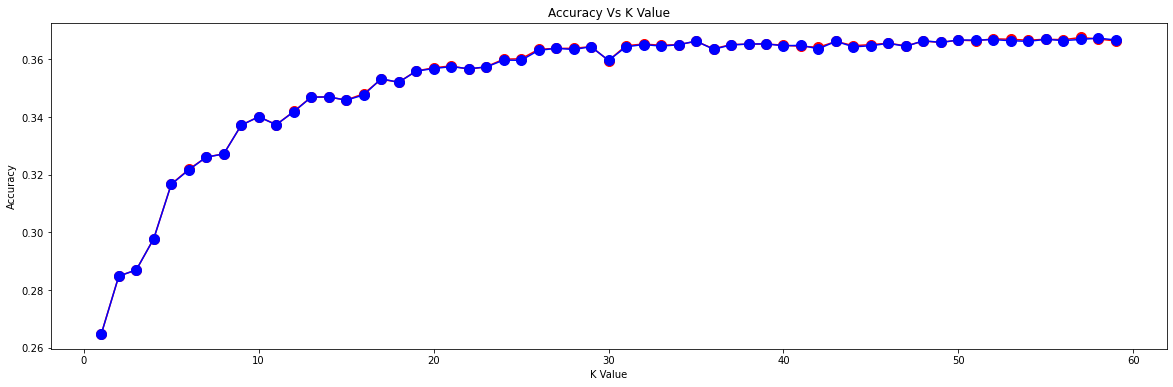

In [61]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy_p2, color='red', marker='o', markersize=10)
plt.plot(range(1, 60), accuracy_p1, color='blue', marker='o', markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

Observations:
- Generally, There is no obvious difference regarding the accuracy after changing the way of splitting training and validation sets (50% training and 50% validation).
- Compared with the former experiments(70% training and 70% validation), the only one sticking difference can be seen is that the accuracy of KNN models become much lower when k=30

Apart from that, we will keep the parameter p as default (p=2), which is euclidean_distance, then compare the different combinations of k and weights parameters. Therefore we can identify the best k value when using different weighting methods.

#### weights='uniform'
Train 60 KNN models with k values from 1 to 60 

In [62]:
accuracy_w_uniform = []

# Calculating the accuracy of knn models with K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='uniform')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    accuracy_w_uniform.append(accuracy_score(y_val, pred_i))

#### weights='distance'
Train 60 KNN models with k values from 1 to 60 

In [63]:
accuracy_w_distance = []

# Calculating the accuracy of knn models with K values between 1 and 60
for i in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=i, p=2, weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    accuracy_w_distance.append(accuracy_score(y_val, pred_i))

Plot the relationship between k values and accuracies we just calculated. The red line represents the model using uniformed weights, while the blue line represents the model, which weights points by the inverse of their distance.

Text(0, 0.5, 'Accuracy')

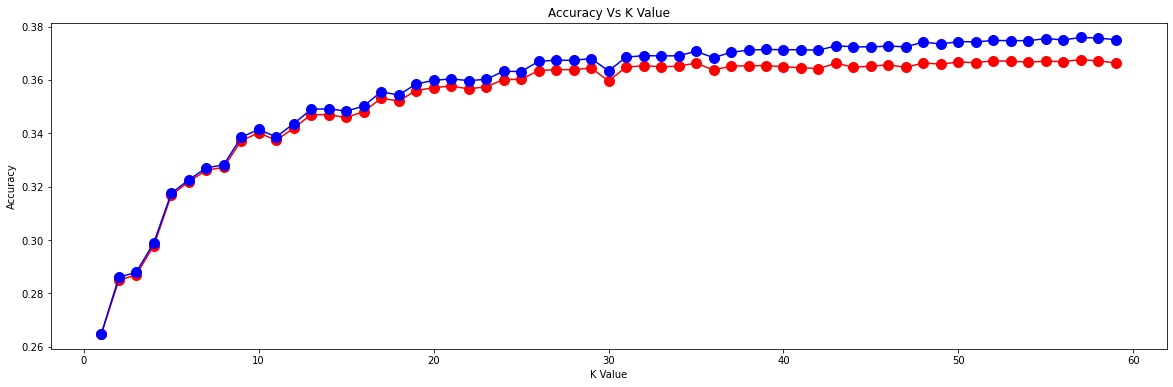

In [64]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 60), accuracy_w_uniform, color='red', marker='o', markersize=10)
plt.plot(range(1, 60), accuracy_w_distance, color='blue', marker='o', markersize=10)
plt.title('Accuracy Vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

Observations:
- Similarly, when comparing with the former experiments (70% training and 30% validation), the only apparent difference is the accuracy when using k=30, which becomes much lower. 

Therefore, the best combination of hyperparameters and data division is:
- k=46, weights='distance', {70% training and 30% validation}

We will leave the parameter p to the default value, as it would not affect the performance of our model obviously.

## Gaussian Naive Bayes Algorithm

The GaussianNB classifier requires all the features be numerical features. However, levels of categorical features in our dataset have already been encoded into ordinal values using numeric encoding map.  

Before training the models, we split 70% data to training set and 30% into validation set respectively.

In [65]:
# split the dataset (30% training, 70% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.3)
    
# using the set of selected good features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] # 0.38926606053355667
X_train = X_train[selected_features]
X_val = X_val[selected_features]

After that, we create a GaussianNB classifier object and train it with the selected good features.  

In [66]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_val)

print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.04      0.00      0.00      5114
           1       0.34      0.46      0.39     16434
           2       0.37      0.64      0.47     18265
           3       0.34      0.16      0.21     11560
           4       0.00      0.00      0.00      2474
           5       0.34      0.32      0.33      7282
           6       0.00      0.00      0.00       561
           7       0.10      0.01      0.02      2145
           8       0.08      0.01      0.02      1049
           9       0.00      0.00      0.00       574
          10       0.44      0.35      0.39      1414

    accuracy                           0.36     66872
   macro avg       0.19      0.18      0.17     66872
weighted avg       0.30      0.36      0.31     66872



D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Try some other ways for dataset dividing
We will find out the highest performance of Gaussian Naive Bayes models when using the following training-testing ratio: 1:9, 2:8, 3:7, ..., 9:1

In [119]:
# length=9, (index/10) referes to the percentage of validation set
accuracy_lst = []

# train 10 models with different training-testing ratio
for test_size in range(1, 10):
    
    # split the dataset
    X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=test_size/10)
    
    # using the same set of selected features
    selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] # 0.38926606053355667
    X_train = X_train[selected_features]
    X_val = X_val[selected_features]

    # create a new Naive Bayes model
    gnb = GaussianNB()
    # train the model using the datasets split in this iteration
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_val)

    # record the accuracy score of this model
    accuracy_lst.append(accuracy_score(y_val, y_pred))



Plot the relationship between training-testing ratio and prediction accuracy

Text(0, 0.5, 'Accuracy')

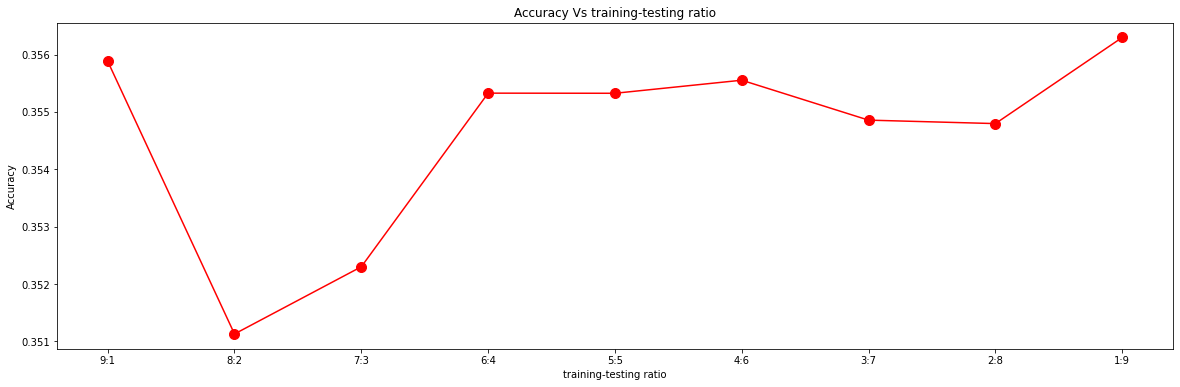

In [122]:
plt.figure(figsize=(20, 6))
plt.plot(['9:1', '8:2', '7:3', '6:4', '5:5', '4:6', '3:7', '2:8', '1:9'], accuracy_lst, color='red', marker='o', markersize=10)
plt.title('Accuracy Vs training-testing ratio')
plt.xlabel('training-testing ratio')
plt.ylabel('Accuracy')

Observations:
- Using 80% data as training set would get the lowest accuracy, which is about 3.51
- Splitting the dataset into {90% training, 10% validation} or {10% training, 90% validation} would get the highest accuracy, which is about 0.356

When compared with the Decision Tree models, Gaussian Naive Bayes models can maintain a relatively stable accuracy when less data are allocated into the training set. However, the over all accuracy of Gaussian Naive Bayes models is lower than that of Decision Tree models. 

## Linear Regression
The linear regression model would not be used in our experiments. This is because, linear regression models are used to predict the continuous targets, while our target features is an categorical feature.

## Logistic Regression
We are going to try logistic regression for our prediction, because the logistic regression model can perform the classification tasks on the datasets with categorical target feature. Moreover, we have 11 classes in target feature, and as the sklearn website says, LogisticRegression() supports the multiclass classification. Therefore, it might be suitable for our dataset. 

First, we will do the following experiments (keep the hyperparameters as default):
- keep using the numeric encode and train a Logistic Regression
- encode the non-ordinal data into ordinal ones using one-hot encoding, and train another logistic regression model.

Then the performance of these two models would be compared.

#### keep using the numeric encoding

Before training the models, we split 70% data to training set and 30% into validation set respectively.

In [31]:
# split the dataset (30% training, 70% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.3)
    
# using the set of selected good features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] # 0.38926606053355667
X_train = X_train[selected_features]
X_val = X_val[selected_features]

Train a Logistic Regression model with default hyperparameters.

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)

print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4847
           1       0.35      0.39      0.37     16454
           2       0.39      0.67      0.50     18471
           3       0.33      0.18      0.23     11506
           4       0.00      0.00      0.00      2449
           5       0.34      0.44      0.38      7314
           6       0.00      0.00      0.00       624
           7       0.00      0.00      0.00      2141
           8       0.00      0.00      0.00      1045
           9       0.00      0.00      0.00       605
          10       0.54      0.30      0.38      1416

    accuracy                           0.37     66872
   macro avg       0.18      0.18      0.17     66872
weighted avg       0.30      0.37      0.32     66872



D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-

#### Use the one-hot encoding

Encode the categorical non-ordinal data into ordinal ones using **one-hot encoding**, and train another logistic regression model.

In [34]:
# the data set before encoding
X.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,isTrauma,Age_Band,is_Local
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,5,4911.0,False,2,False
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,5,5954.0,True,2,False
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,5,4745.0,True,2,False
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,5,7272.0,True,2,False
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,5,5558.0,True,2,False


In [35]:
# encode the non-ordinal categorical features into ordinal ones 
X_onehot = pd.get_dummies(X)
X_onehot.head()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,...,Type_of_Admission_Emergency,Type_of_Admission_Trauma,Type_of_Admission_Urgent,Severity_of_Illness_Extreme,Severity_of_Illness_Minor,Severity_of_Illness_Moderate,Age_Band_0,Age_Band_1,Age_Band_2,Age_Band_3
0,1,8,3,3,2.0,31397,7.0,2,5,4911.0,...,1,0,0,1,0,0,0,0,1,0
1,2,2,5,2,2.0,31397,7.0,2,5,5954.0,...,0,1,0,1,0,0,0,0,1,0
2,3,10,1,2,2.0,31397,7.0,2,5,4745.0,...,0,1,0,1,0,0,0,0,1,0
3,4,26,2,2,2.0,31397,7.0,2,5,7272.0,...,0,1,0,1,0,0,0,0,1,0
4,5,26,2,2,2.0,31397,7.0,2,5,5558.0,...,0,1,0,1,0,0,0,0,1,0


In [36]:
X_onehot.columns

Index(['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 'patientid',
       'City_Code_Patient', 'Visitors_with_Patient', 'Age',
       'Admission_Deposit', 'isTrauma', 'is_Local', 'Hospital_type_code_a',
       'Hospital_type_code_b', 'Hospital_type_code_c', 'Hospital_type_code_d',
       'Hospital_type_code_e', 'Hospital_type_code_f', 'Hospital_type_code_g',
       'Hospital_region_code_X', 'Hospital_region_code_Y',
       'Hospital_region_code_Z', 'Department_TB & Chest disease',
       'Department_anesthesia', 'Department_gynecology',
       'Department_radiotherapy', 'Department_surgery', 'Ward_Type_P',
       'Ward_Type_Q', 'Ward_Type_R', 'Ward_Type_S', 'Ward_Type_T',
       'Ward_Type_U', 'Ward_Facility_Code_A', 'Ward_Facility_Code_B',
       'Ward_Facility_Code_C', 'Ward_Facility_Code_D', 'Ward_Facility_Code_E',
       'Ward_Facility_Code_F', 'Type_of_Admission_Emergency',
       'Type_of_Admission_Trauma', 'Type_of_Admi

As can be seen, the non-ordinal features are split into multiple new features according to their levels. For example, Severity_of_Illness originally has 3 levels: "Extreme", "Minor", and "Moderate". So, it is split into new features of 'Severity_of_Illness_Extreme', 'Severity_of_Illness_Minor' and 'Severity_of_Illness_Moderate'.

then normalize the data

In [43]:
X_onehot_scaled = pd.DataFrame(scaler.fit_transform(X_onehot), columns=X_onehot.columns, index=X_onehot.index)
X_onehot_scaled.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,...,Type_of_Admission_Emergency,Type_of_Admission_Trauma,Type_of_Admission_Urgent,Severity_of_Illness_Extreme,Severity_of_Illness_Minor,Severity_of_Illness_Moderate,Age_Band_0,Age_Band_1,Age_Band_2,Age_Band_3
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,...,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,0.500000,0.558672,0.314310,0.133234,0.541862,0.499507,0.169257,0.102628,0.458642,0.334573,...,0.369541,0.478150,0.152309,0.178129,0.269666,0.552205,0.072297,0.328108,0.458331,0.141265
std,0.288676,0.278508,0.258545,0.048674,0.291023,0.288551,0.127357,0.055127,0.209952,0.118025,...,0.482681,0.499523,0.359321,0.382622,0.443787,0.497268,0.258979,0.469525,0.498261,0.348295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.322581,0.083333,0.083333,0.333333,0.249546,0.081081,0.062500,0.333333,0.259123,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.580645,0.333333,0.125000,0.666667,0.499331,0.189189,0.093750,0.444444,0.319396,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,0.806452,0.500000,0.166667,0.666667,0.748114,0.189189,0.125000,0.555556,0.391942,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Divide the data into (training + validation) set and testing set. We will use the same random state as the one we used when splitting the numerical encoded data, so we can get the same testing set. These two testing sets contain the same data instances, only the features are different, this is due to the using of one-hot encoding.

In [60]:
# data set --> (train + validate) + test
X_train_val_onehot_scaled, X_test_onehot, y_train_val, y_test = train_test_split(X_onehot_scaled, y, test_size=0.3, random_state=27)

Divide the dataset using the same training-validation ratio as the last model. In terms of the features selection, this time we should use the features derived from the selected good features.

In [45]:
# split the dataset (30% training, 70% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_onehot_scaled, y_train_val, test_size=0.3)
    
# using the set of selected good features
selected_features = ['Visitors_with_Patient', 
                     'Severity_of_Illness_Extreme', 'Severity_of_Illness_Minor', 'Severity_of_Illness_Moderate',
                     'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R', 'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
                     'Bed_Grade', 
                     'isTrauma', 
                     'Age_Band_0', 'Age_Band_1', 'Age_Band_2', 'Age_Band_3',
                     'is_Local']

X_train = X_train[selected_features]
X_val = X_val[selected_features]

Train another logistic model

In [58]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3278
           1       0.35      0.39      0.37     10912
           2       0.39      0.67      0.49     12216
           3       0.32      0.17      0.23      7794
           4       0.00      0.00      0.00      1666
           5       0.34      0.44      0.38      4866
           6       0.00      0.00      0.00       389
           7       0.00      0.00      0.00      1417
           8       0.00      0.00      0.00       672
           9       0.00      0.00      0.00       374
          10       0.55      0.32      0.41       998

    accuracy                           0.37     44582
   macro avg       0.18      0.18      0.17     44582
weighted avg       0.30      0.37      0.32     44582



D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-

After comparing, we can get that the model trained with the dataset using one-hot encoding has an higher accuracy and average class accuracy. Therefore, the one-hot encoding might be more suitable for logistic regression models, and we will keep using this in the rest of our experiments about this model. 

#### Hyperparmeter tunning
Then we will find out the values of hyperparameters that can make the highest performance of logistic regression model. Following parameters would be tried:
- max_iter: 10, 100, 1000, 10000
- solver: 'lbfgs', 'newton-cg', 'sag', 'saga'

##### Try different max_iter
We train four models using max_iter of 10, 100, 1000, 10000 respectively, then measure and compare the performance of them.

In [65]:
accuracy = []

# train logistic regression models using different values of max_iter
for max_iter in [10, 100, 1000, 10000]:
    log_reg = LogisticRegression(max_iter=max_iter)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_val)
    accuracy.append(accuracy_score(y_val, y_pred))

D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Text(0, 0.5, 'Accuracy')

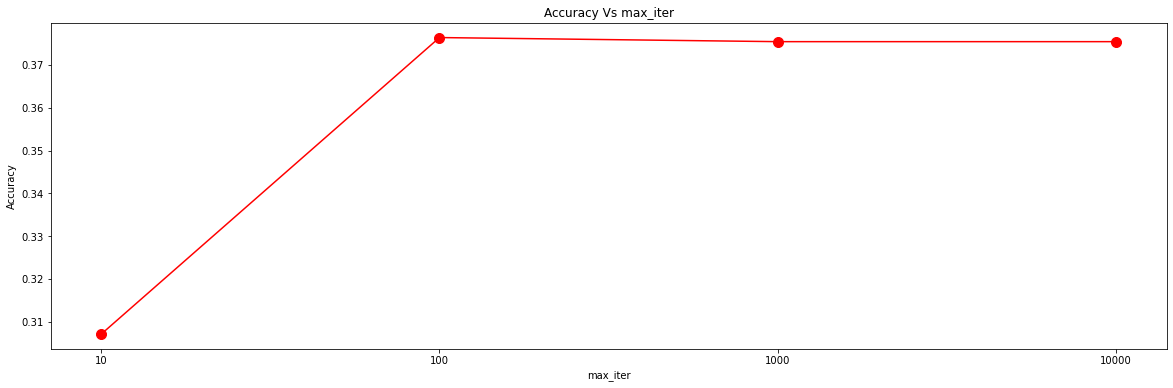

In [66]:
# plot the results
plt.figure(figsize=(20, 6))
plt.plot(['10', '100', '1000', '10000'], accuracy, color='red', marker='o', markersize=10)
plt.title('Accuracy Vs max_iter')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')

Observations:
- When using 10 and 100 as the max_iter, there is a warning says our model failed to converge and we should use a larger max_iter.
- Models using 100, 1000 and 10000 as the max_iter have similar accuracy and much higher than that of max_iter=10.

##### Try different solver
The hyperparameter of 'solver' defines the algorithms used to optimize the model. Four values are available for solving the multiclass problems: 'lbfgs', 'newton-cg', 'sag' and 'saga'. We will try to use these 4 solvers when different values of  max_iter is set.

###### max_iter=100

In [75]:
accuracy = []

for solver in ['lbfgs', 'newton-cg', 'sag', 'saga']:
    log_reg = LogisticRegression(max_iter=100, solver=solver)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_val)
    accuracy.append(accuracy_score(y_val, y_pred))

D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0, 0.5, 'Accuracy')

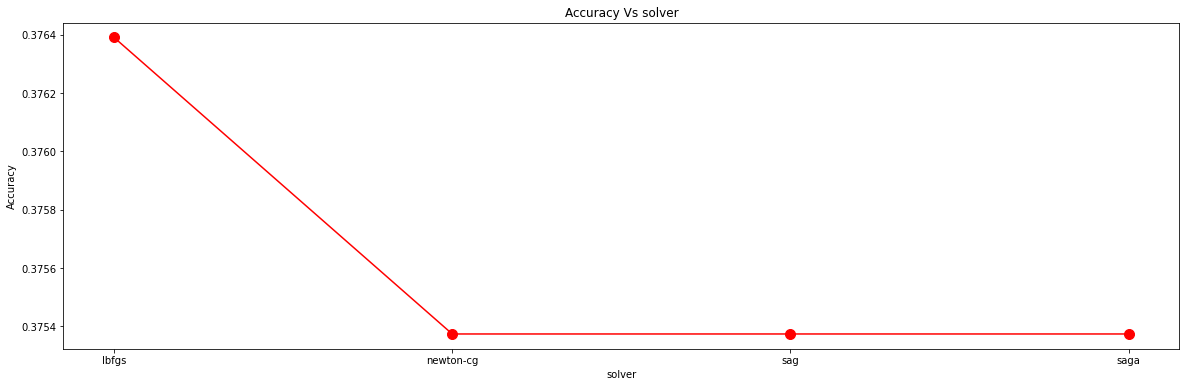

In [76]:
plt.figure(figsize=(20, 6))
plt.plot(['lbfgs', 'newton-cg', 'sag', 'saga'], accuracy, color='red', marker='o', markersize=10)
plt.title('Accuracy Vs solver')
plt.xlabel('solver')
plt.ylabel('Accuracy')

###### max_iter=1000

In [77]:
accuracy = []

for solver in ['lbfgs', 'newton-cg', 'sag', 'saga']:
    log_reg = LogisticRegression(max_iter=1000, solver=solver)
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_val)
    accuracy.append(accuracy_score(y_val, y_pred))

Text(0, 0.5, 'Accuracy')

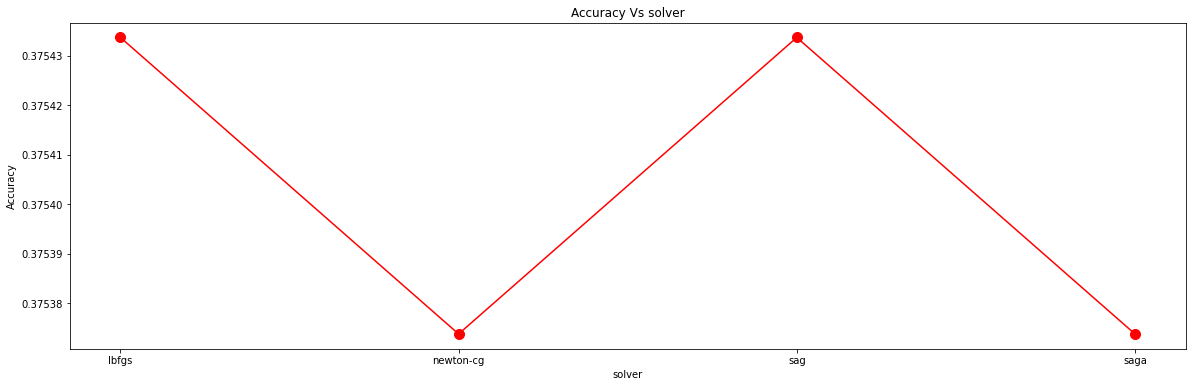

In [78]:
plt.figure(figsize=(20, 6))
plt.plot(['lbfgs', 'newton-cg', 'sag', 'saga'], accuracy, color='red', marker='o', markersize=10)
plt.title('Accuracy Vs solver')
plt.xlabel('solver')
plt.ylabel('Accuracy')

After comparing the above two experiment results, we can conclude that:
- 'lbfgs' is the best solver when max_iter is set to 100, which has the accuracy higher than another three solver algorithms.
- When max_iter is set to 1000, both the accuracy of 'lbfgs' and 'sag' is higher than the other two solvers.
- The accuracy of 'lbfgs' and 'sag' are similar when max_iter=1000
- When max_iter=1000, the accuracy of 'lbfgs' and 'sag' are lower than that of 'lbfgs' when max_iter=100

As the accuracy of 'lbfgs' does not decrease much when max_iter=1000, and our model would be failed to converge when max_iter=100, we will choose the combination of max_iter=1000 and solver='lbfgs' as the best combination.

### Different dataset division
We will find out the highest performance of logistic regression models when using the following training-testing ratio: 1:9, 2:8, 3:7, ..., 9:1

Specifically, models would be trained with difference data divisions, and for each of them, we will use max_iter=100 and solver='lbfgs' which has shown the best performance in the previous experiments.

In [80]:
# length=9, (index/10) referes to the percentage of validation set
accuracy_lst = []

# train 10 models with different training-testing ratio
for test_size in range(1, 10):
    
    # split the dataset
    X_train, X_val, y_train, y_val = train_test_split(X_train_val_onehot_scaled, y_train_val, test_size=test_size/10)
    
    # using the set of selected good features
    selected_features = ['Visitors_with_Patient', 
                     'Severity_of_Illness_Extreme', 'Severity_of_Illness_Minor', 'Severity_of_Illness_Moderate',
                     'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R', 'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
                     'Bed_Grade', 
                     'isTrauma', 
                     'Age_Band_0', 'Age_Band_1', 'Age_Band_2', 'Age_Band_3',
                     'is_Local']
    
    X_train = X_train[selected_features]
    X_val = X_val[selected_features]
    
    
    # create a new Logistic regression model
    log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_val)

    # record the accuracy score of this model
    accuracy_lst.append(accuracy_score(y_val, y_pred))



Plot the relationship between training-testing ratio and prediction accuracy

Text(0, 0.5, 'Accuracy')

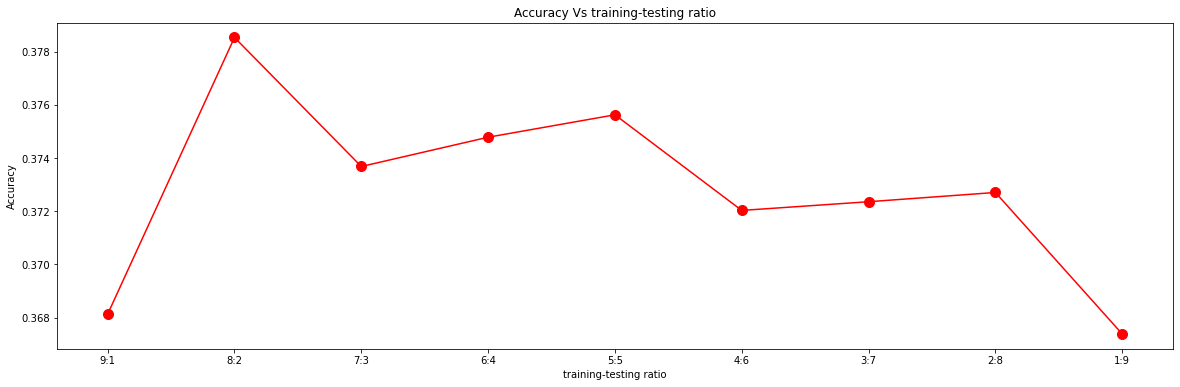

In [81]:
plt.figure(figsize=(20, 6))
plt.plot(['9:1', '8:2', '7:3', '6:4', '5:5', '4:6', '3:7', '2:8', '1:9'], accuracy_lst, color='red', marker='o', markersize=10)
plt.title('Accuracy Vs training-testing ratio')
plt.xlabel('training-testing ratio')
plt.ylabel('Accuracy')

As the result shows, when using {80% training and 20% validation} to split the datasets, our logistic regression model gets the highest accuracy.

Therefore, the best combination of hyperparameters and data division is:
- max_iter=1000, solver='lbfgs', {80% training and 20% validation}

# Ensembles

## Bagging

The bagging classifier requires a base model. As the decision tree models have the highest accuracy in our prediction, we will use a decision tree model as the base model. In terms of the hyperparameters and data division of the base model, we will use the one giving the highest accuracy, which is criterion=entropy, max_depth=9, {80% training, 20% validation}

#### Base model: decision tree
criterion=entropy, max_depth=9, {80% training, 20% validation}

In [63]:
# split the training and validation set (80 : 20)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.2)

# using the selected features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] 
X_train = X_train[selected_features]
X_val = X_val[selected_features]

# create the best decision tree model
tree_best = DecisionTreeClassifier(criterion='entropy', random_state=9)

Train a bagging classifier with 10 estimators, using the decision tree model as the base model.

In [64]:
bag_clf = BaggingClassifier(base_estimator=tree_best, n_estimators=10)
bag_clf.fit(X_train, y_train.values.ravel())

y_pred = bag_clf.predict(X_val)

# record the accuracy
bag_tree_accuracy = accuracy_score(y_val, y_pred)

print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.24      0.02      0.03      3375
           1       0.36      0.50      0.42     10922
           2       0.40      0.58      0.47     12179
           3       0.37      0.21      0.27      7794
           4       0.08      0.00      0.00      1638
           5       0.38      0.43      0.41      4858
           6       0.00      0.00      0.00       409
           7       0.26      0.04      0.08      1403
           8       0.30      0.22      0.25       660
           9       0.24      0.03      0.05       410
          10       0.50      0.34      0.40       934

    accuracy                           0.38     44582
   macro avg       0.29      0.22      0.22     44582
weighted avg       0.35      0.38      0.34     44582



As the result shows, the accuracy of this ensemble is 0.38, which is even lower than the accuracy of its base model: decision tree, which gave an accuracy of 0.393

### Changing composition used in Bagging ensemble 
We are going to try to use other models as the base model to train several bagging classifiers and compare the performance of them. For each base model, we would use the best values of hyperparameters for them.

Specifically, we are going to use the KNN and Logistic Regression models, which have also shown relatively high accuracy apart from the decision tree models. 

#### Base model: KNN
k=46, weights='distance', {70% training and 30% validation}

In [67]:
# split the training and validation set (30 : 70)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.3)

# using the selected features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] 
X_train = X_train[selected_features]
X_val = X_val[selected_features]

# create the best KNN model
knn_best = KNeighborsClassifier(n_neighbors=46, weights='distance')

Train a bagging classifier with 10 estimators, using the KNN model as the base model.

In [68]:
bag_clf = BaggingClassifier(base_estimator=knn_best, n_estimators=10)
bag_clf.fit(X_train, y_train.values.ravel())

y_pred = bag_clf.predict(X_val)

# record the accuracy
bag_knn_accuracy = accuracy_score(y_val, y_pred)

print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.23      0.02      0.03      5029
           1       0.36      0.49      0.42     16615
           2       0.40      0.59      0.48     18202
           3       0.37      0.21      0.26     11598
           4       0.06      0.00      0.00      2400
           5       0.38      0.43      0.40      7272
           6       0.08      0.00      0.00       601
           7       0.21      0.03      0.06      2174
           8       0.31      0.21      0.25      1015
           9       0.50      0.04      0.07       576
          10       0.51      0.33      0.40      1390

    accuracy                           0.38     66872
   macro avg       0.31      0.21      0.22     66872
weighted avg       0.35      0.38      0.34     66872



The bagging ensemble using knn as the base model has an accuracy of 0.38, which is similar with one using decision tree. However, this ensemble reaches a average class accuracy of 0.21 that is a little bit lower than 0.22 of the one using decision tree.

#### Base model: Logistic Regression
max_iter=1000, solver='lbfgs', {80% training and 20% validation}, use one-hot encoding

In [69]:
# split the dataset (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_onehot_scaled, y_train_val, test_size=0.2)
    
# using the set of selected good features
selected_features = ['Visitors_with_Patient', 
                     'Severity_of_Illness_Extreme', 'Severity_of_Illness_Minor', 'Severity_of_Illness_Moderate',
                     'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R', 'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
                     'Bed_Grade', 
                     'isTrauma', 
                     'Age_Band_0', 'Age_Band_1', 'Age_Band_2', 'Age_Band_3',
                     'is_Local']

X_train = X_train[selected_features]
X_val = X_val[selected_features]

# create the best logistic regression model
log_reg_best = LogisticRegression(max_iter=1000, solver='lbfgs')

Train a bagging classifier with 10 estimators, using the logistic regression model as the base model.

In [70]:
bag_clf = BaggingClassifier(base_estimator=log_reg_best, n_estimators=10)
bag_clf.fit(X_train, y_train.values.ravel())

y_pred = bag_clf.predict(X_val)

# record the accuracy
bag_logi_accuracy = accuracy_score(y_val, y_pred)

print(classification_report(y_pred=y_pred, y_true=y_val))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3269
           1       0.36      0.41      0.38     10976
           2       0.39      0.67      0.49     12208
           3       0.34      0.19      0.24      7828
           4       0.00      0.00      0.00      1616
           5       0.37      0.46      0.41      4995
           6       0.00      0.00      0.00       380
           7       0.00      0.00      0.00      1341
           8       0.00      0.00      0.00       661
           9       0.00      0.00      0.00       400
          10       0.55      0.31      0.40       908

    accuracy                           0.38     44582
   macro avg       0.18      0.19      0.18     44582
weighted avg       0.31      0.38      0.33     44582



D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As shown in the results, the average class accuracy of the bagging ensemble using logistic regression as base model is 0.19, which is much lower than that of the bagging ensembles using decision tree and knn models. 

#### Graph shows how differ the results by changing compositions of Bagging ensemble

<AxesSubplot:xlabel='Base model', ylabel='Accuracy'>

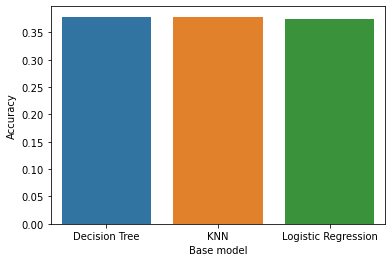

In [72]:
accuracy_lst = [bag_tree_accuracy, bag_knn_accuracy, bag_logi_accuracy]
base_model_lst = ['Decision Tree', 'KNN', 'Logistic Regression']
accuracy_compare = pd.DataFrame({'Accuracy': accuracy_lst, 'Base model': base_model_lst})
sns.barplot(x="Base model",y="Accuracy",data=accuracy_compare)

From the accuracy graph we can see that the bagging ensembles using decision tree, knn and logistic regression base models have very similar accuracies. However, the accuracy of that using logistic regression is slightly lower than the other two ensembles. 

Therefore, we will take the one using decision tree as the best bagging classifier.

## Random Forest
For the Random Forest classifier, we are going to find the best hyperparameter values of if. The hyperparameters involved in our experiments are:
- n_estimators: 50, 200
- max_depth: from 1 to 20

In [73]:
# split the training and validation set (70 : 30)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.3)

# using the selected features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] 
X_train = X_train[selected_features]
X_val = X_val[selected_features]

In [74]:
accuracy_es50 = []
accuracy_es200 = []

n_estimators = [50, 200]

# calculate the accuracy scores for Random Forest classifier using different combination of n_estimators and max_depth
for n in n_estimators:
    for max_dep in range(1, 21):

        # create a new model using this combination of hyperparameter
        rf_clf = RandomForestClassifier(n_estimators=n, max_depth=max_dep)
        rf_clf.fit(X_train, y_train.values.ravel())
        y_pred = rf_clf.predict(X_val)

        # recorde the accuracy of this model 
        if n == 50:
            accuracy_es50.append(accuracy_score(y_val, y_pred))
        elif n == 200:
            accuracy_es200.append(accuracy_score(y_val, y_pred))


Plot the relations between the accuracy and the hyperparameter choosing. The red line represents the models using n_estimators=50, while the blue line show the models using n_estimators=200

Text(0, 0.5, 'Accuracy')

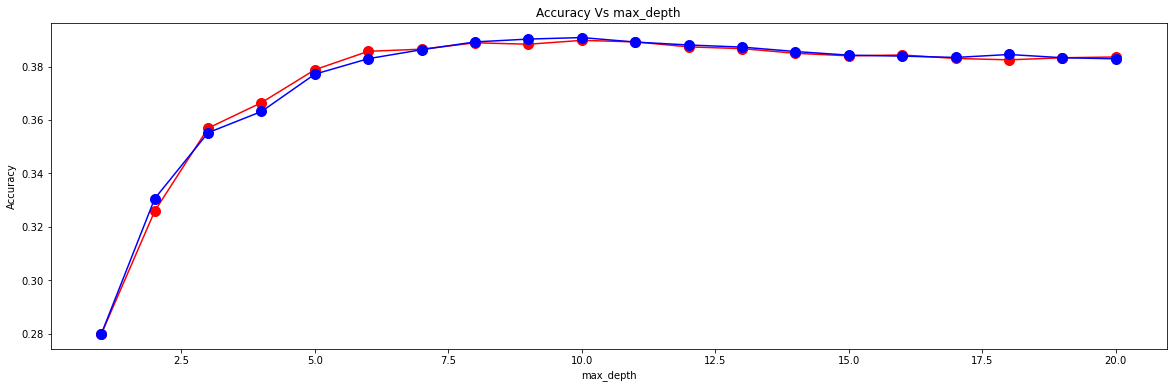

In [76]:
plt.figure(figsize=(20, 6))
plt.plot(range(1, 21), accuracy_es50, color='red', marker='o', markersize=10)
plt.plot(range(1, 21), accuracy_es200, color='blue', marker='o', markersize=10)
plt.title('Accuracy Vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

Observations:
- When the max_depth is between 3 and 7, using less estimators (50) would get a slightly higher performance than using more estimators (200).
- The accuracy of the Random Forest classifiers using both the 50 and 200 estimators reach the top and become relatively stable when max_depth=10
- Generally, using 50 and 200 estimators do not have obvious differences in accuracy. But after reaching the highest accuracy, the one using 200 estimators has the accuracy slightly higher than the other one. 

Therefore, the parameter values that give the best performance of this Random Forest classifier is:
- n_estimators=200, max_depth=10

### Interaction between training/validation set and Random Forest ensemble

We will try to train Random Forest classifiers using different ratio of training/validation dataset and compare the performance of them. For each of the ensemble, we will use the hyperparameter of n_estimators=200 and max_depth=10, which have shown the best performance.

In [77]:
# length=9, (index/10) referes to the percentage of validation set
accuracy_lst = []
    
# train 10 models with different training-testing ratio
for test_size in range(1, 10):
    
    # split the dataset
    X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=test_size/10)

    # using the same set of selected features
    selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] # 0.38926606053355667
    X_train = X_train[selected_features]
    X_val = X_val[selected_features]
    
    # create a new Random Forest classifier
    rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10)
    # train the model using the datasets split in this iteration
    rf_clf.fit(X_train, y_train.values.ravel())
    y_pred = rf_clf.predict(X_val)

    # record the accuracy score of this model
    accuracy_lst.append(accuracy_score(y_val, y_pred))



Plot the relationship between training-testing ratio and prediction accuracy

Text(0, 0.5, 'Accuracy')

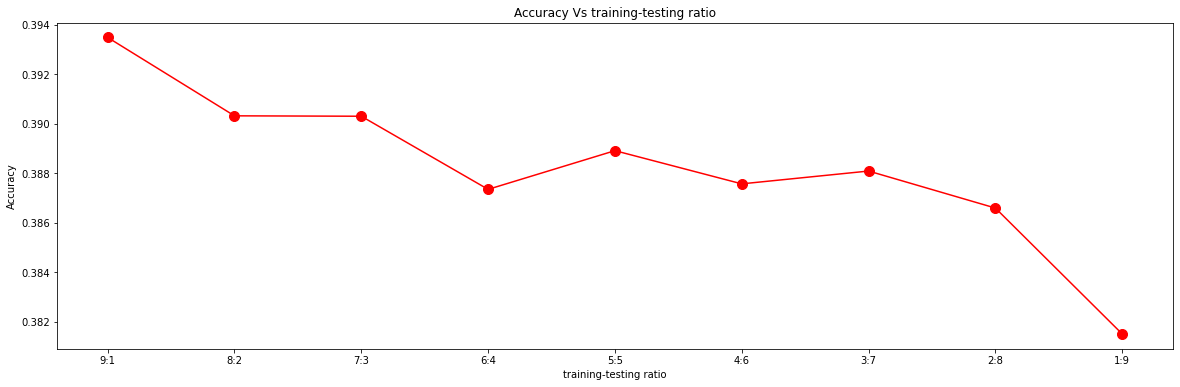

In [78]:
plt.figure(figsize=(20, 6))
plt.plot(['9:1', '8:2', '7:3', '6:4', '5:5', '4:6', '3:7', '2:8', '1:9'], accuracy_lst, color='red', marker='o', markersize=10)
plt.title('Accuracy Vs training-testing ratio')
plt.xlabel('training-testing ratio')
plt.ylabel('Accuracy')

As the figure shows, the more the data being allocated into training set, the higher the accuracy of our Random Forest classifier would be. Therefore, {90% training, 10% validation} would be the one most suitable for this ensemble, giving an accuracy about 0.394

## Voting classifier

Voting classifier is based on the voting results of multiple models. Therefore, we take 3 models that shows the best performance in the previous experiments as the candidate, which are:
- decision tree
- logistic regression
- random forest

First, we will try to train voting classifiers using 2 of them, which shows the best performance. Then we will use all of these 3 models to train another voting classifier and compare their performance. (We use the uniformed weights for now)

### Composition group 1
decision tree + random forest

We have created our best tree, and now let's create our best random forest using n_estimators=200, max_depth=10, {90% training, 10% validation}.

In [80]:
# split the training and validation set (90 : 10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=0.1)

# using the selected features
selected_features = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local'] 
X_train = X_train[selected_features]
X_val = X_val[selected_features]

# create the random forest using the selected parameters
rf_clf_best = RandomForestClassifier(n_estimators=200, max_depth=10)

Create and train the voting classifier using decision tree + random forest

In [84]:
voting_clf = VotingClassifier([('decTree', tree_best), ('RandForest', rf_clf_best)], weights=None)
voting_clf.fit(X_train, y_train.values.ravel())

y_pred = voting_clf.predict(X_val)
print(classification_report(y_pred=y_pred, y_true=y_val))
print("Accuracy: ", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.24      0.02      0.04      1611
           1       0.36      0.54      0.44      5472
           2       0.42      0.57      0.48      6141
           3       0.38      0.26      0.31      3837
           4       0.00      0.00      0.00       826
           5       0.40      0.43      0.42      2476
           6       0.00      0.00      0.00       181
           7       0.35      0.03      0.05       747
           8       0.46      0.09      0.15       330
           9       0.24      0.02      0.04       210
          10       0.57      0.27      0.37       460

    accuracy                           0.39     22291
   macro avg       0.31      0.20      0.21     22291
weighted avg       0.36      0.39      0.35     22291

Accuracy:  0.3907855188192544


This voting classifier gets an accuracy of 0.391, which is even a little bit lower than the accuracy of our best tree (0.393) and best random forest (0.394). 

### Composition group 2
decision tree + random forest + logistic regression

In [85]:
voting_clf = VotingClassifier([('decTree', tree_best), ('RandForest', rf_clf_best), ('LogReg', log_reg_best)], weights=None)
voting_clf.fit(X_train, y_train.values.ravel())

y_pred = voting_clf.predict(X_val)
print(classification_report(y_pred=y_pred, y_true=y_val))
print("Accuracy: ", accuracy_score(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.01      0.02      1611
           1       0.37      0.52      0.43      5472
           2       0.41      0.60      0.49      6141
           3       0.38      0.21      0.28      3837
           4       0.00      0.00      0.00       826
           5       0.39      0.51      0.44      2476
           6       0.00      0.00      0.00       181
           7       0.33      0.00      0.01       747
           8       0.49      0.07      0.13       330
           9       0.00      0.00      0.00       210
          10       0.55      0.35      0.43       460

    accuracy                           0.39     22291
   macro avg       0.29      0.21      0.20     22291
weighted avg       0.36      0.39      0.35     22291

Accuracy:  0.39343232694809566


D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


After adding our best logistic regression model into the voting, the accuracy increased a bit to the 0.393, and the average class accuracy also increased from 0.20 to 0.21 

# Evaluations and Conclusions
In the previous sections we have evaluated the performance of the models and ensembles using different hyperparameters, training-validation division ratio. As a result, the best combination of these settings for each of them was concluded. 

In this section, we will train one model for each of them using their own best combination of hyperparameters and training-validation ratio. Then evaluate them against each other using the **testing dataset**. Therefore, the performance of all the models and ensembles would be measured by predicting the same testing data.

Define a function to split data with specific test_size and using the selected features

In [67]:
# a set of selected good features for models using numeric encoding
selected_features_numeric = ['Visitors_with_Patient', 'Severity_of_Illness', 'Ward_Type', 'Bed_Grade', 'isTrauma', 'Age_Band', 'is_Local']

# a set of features derived from the selected good features (for models using one-hot encoding)
selected_features_onehot = ['Visitors_with_Patient', 
                             'Severity_of_Illness_Extreme', 'Severity_of_Illness_Minor', 'Severity_of_Illness_Moderate',
                             'Ward_Type_P', 'Ward_Type_Q', 'Ward_Type_R', 'Ward_Type_S', 'Ward_Type_T', 'Ward_Type_U',
                             'Bed_Grade', 
                             'isTrauma', 
                             'Age_Band_0', 'Age_Band_1', 'Age_Band_2', 'Age_Band_3',
                             'is_Local']


def train_val_generate(test_size, encode):
    
    if encode == 'numeric':
        # split the dataset that using numeric encoding
        X_train, X_val, y_train, y_val = train_test_split(X_train_val_encoded_scaled, y_train_val, test_size=test_size)
        
        # using the set of selected good features
        selected_features = selected_features_numeric
        
    elif encode == 'one-hot':
        # split the dataset that using one-hot encoding
        X_train, X_val, y_train, y_val = train_test_split(X_train_val_onehot_scaled, y_train_val, test_size=0.3)

        # using set of features derived from the selected good features
        selected_features = selected_features_onehot
        
    X_train = X_train[selected_features]
    X_val = X_val[selected_features]
    
    return X_train, X_val, y_train, y_val

Using selected features on testing sets. These two testing sets contain the same data instances, only the features are different, this is due to the using of one-hot encoding.

In [68]:
# The test set for models using numeric encoding
X_test = X_test[selected_features_numeric] 

In [69]:
# The test set for models using one-hot encoding (logistic regression) 
X_test_onehot = X_test_onehot[selected_features_onehot]

Next step, we will create and train the best model for each algorithm. 

#### The best decision tree
criterion=entropy, max_depth=9, {80% training, 20% validation}

In [239]:
X_train, X_val, y_train, y_val = train_val_generate(0.2, 'numeric')

In [240]:
tree_best = DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [241]:
%%time
# train the best decision tree and measure the time
tree_best.fit(X_train, y_train)

CPU times: total: 156 ms
Wall time: 134 ms


DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [242]:
%%time
# predict using the best decision tree and measure the time
pred_tree_best = tree_best.predict(X_test)

CPU times: total: 31.2 ms
Wall time: 16 ms


#### The best KNN
k=46, weights='distance', {70% training and 30% validation}

In [243]:
X_train, X_val, y_train, y_val = train_val_generate(0.3, 'numeric')

In [244]:
knn_best = KNeighborsClassifier(n_neighbors=46, weights='distance')

In [245]:
%%time
# train the best KNN model and measure the time
knn_best.fit(X_train, y_train)

CPU times: total: 469 ms
Wall time: 473 ms


KNeighborsClassifier(n_neighbors=46, weights='distance')

In [246]:
%%time
# predict using the best KNN model and measure the time
pred_knn_best = knn_best.predict(X_test)

CPU times: total: 10.6 s
Wall time: 10.6 s


#### The best Gaussian Naive Bayes classifier
{90% training, 10% validation}

In [247]:
X_train, X_val, y_train, y_val = train_val_generate(0.1, 'numeric')

In [248]:
gnb_best = GaussianNB()

In [249]:
%%time
# train the best Gaussian Naive Bayes model and measure the time
gnb_best.fit(X_train, y_train)

CPU times: total: 62.5 ms
Wall time: 54 ms


GaussianNB()

In [250]:
%%time
# predict using the best Gaussian Naive Bayes model and measure the time
pred_gnb_best = gnb_best.predict(X_test)

CPU times: total: 62.5 ms
Wall time: 64.1 ms


#### The best Logistic Regression model
max_iter=1000, solver='lbfgs', {80% training and 20% validation}

In [251]:
X_train, X_val, y_train, y_val = train_val_generate(0.2, 'one-hot')

In [252]:
log_reg_best = LogisticRegression(max_iter=1000, solver='lbfgs')

In [253]:
%%time
# train the best Logistic Regression model and measure the time
log_reg_best.fit(X_train, y_train)

CPU times: total: 2min 28s
Wall time: 1min 5s


LogisticRegression(max_iter=1000)

In [254]:
%%time
# predict using the best Logistic Regression model and measure the time
pred_logreg_best = log_reg_best.predict(X_test_onehot)

CPU times: total: 109 ms
Wall time: 39 ms


#### The best Bagging classifier
Base model: decision tree - criterion=entropy, max_depth=9, {80% training, 20% validation}

In [255]:
X_train, X_val, y_train, y_val = train_val_generate(0.2, 'numeric')

In [256]:
bag_best = BaggingClassifier(base_estimator=tree_best, n_estimators=10)

In [257]:
%%time
# train the best Bagging classifier and measure the time
bag_best.fit(X_train, y_train)

CPU times: total: 969 ms
Wall time: 957 ms


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=9))

In [258]:
%%time
# predict using the best Bagging classifier and measure the time
pred_bag_best = bag_best.predict(X_test)

CPU times: total: 188 ms
Wall time: 191 ms


#### The best random forest classifier
n_estimators=200, max_depth=10, {90% training, 10% validation}

In [259]:
X_train, X_val, y_train, y_val = train_val_generate(0.1, 'numeric')

In [260]:
rf_best = RandomForestClassifier(n_estimators=200, max_depth=10)

In [261]:
%%time
# train the best random forest classifier and measure the time
rf_best.fit(X_train, y_train)

CPU times: total: 11.1 s
Wall time: 11.1 s


RandomForestClassifier(max_depth=10, n_estimators=200)

In [262]:
%%time
# predict using the best random forest classifier and measure the time
pred_rf_best = rf_best.predict(X_test)

CPU times: total: 2.8 s
Wall time: 2.8 s


#### The best voting classifier
decision tree + random forest + logistic regression

In [263]:
X_train, X_val, y_train, y_val = train_val_generate(0.2, 'numeric')

In [264]:
voting_best = VotingClassifier([('decTree', tree_best), ('RandForest', rf_best), ('LogReg', log_reg_best)], weights=None)

In [265]:
%%time
# train the best voting classifier and measure the time
voting_best.fit(X_train, y_train.values.ravel())

CPU times: total: 1min 16s
Wall time: 46.1 s


VotingClassifier(estimators=[('decTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=9)),
                             ('RandForest',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=200)),
                             ('LogReg', LogisticRegression(max_iter=1000))])

In [266]:
%%time
# predict using the best voting classifier and measure the time
pred_voting_best = voting_best.predict(X_test)

CPU times: total: 3.3 s
Wall time: 3.29 s


Use a dictionary to store all the models and ensembles we created.

In [344]:
models_and_ensembles = {
    'DecisionTree': tree_best,
    'KNN': knn_best,
    'GaussianNB': gnb_best,
    'LogisticReg': log_reg_best,
    'Bagging': bag_best,
    'RandomForest': rf_best,
    'Voting': voting_best
}

Use a dictionary to store the predictions of all the models and ensembles.

In [345]:
prediction_results = {
    'DecisionTree': pred_tree_best,
    'KNN': pred_knn_best,
    'GaussianNB': pred_gnb_best,
    'LogisticReg': pred_logreg_best,
    'Bagging': pred_bag_best,
    'RandomForest': pred_rf_best,
    'Voting': pred_voting_best
}

Now, we have trained all of our best models and ensembles, so we can start evaluating and comparing their performance against each other.

### Timing performance

We have measured the training and predicting time consumption of every model and ensemble in las section. In terms of the training, the following models are much efficient than others, which use time within 1s: Decision tree, KNN, GaussianNB and Bagging classifier. Specifically, **GaussianNB** uses the shortest time that is about 54ms, while the **voting classifier** and **Random Forest classifier** show the worst performance, which are 46s and 11s respectively.

In terms of the predicting, most of the models and ensembles use less time, while only **KNN** model use the time much more than its own training time, which is 10.6s. The **decision tree** and **Logistic Regression** models are the most efficient ones, which use only 16ms and 39ms respectively.  

### Predicting performance

We has 11 classes in our target feature 'Stay'. We plot the number of instance of each class in our dataset 

<BarContainer object of 11 artists>

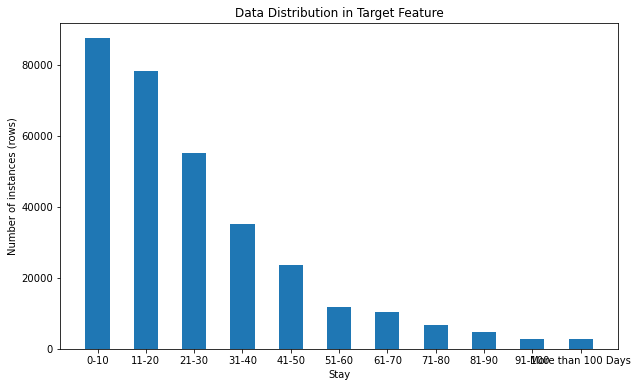

In [368]:
plt.figure(figsize=(10, 6))
plt.xlabel('Stay')
plt.ylabel('Number of instances (rows)')
plt.title('Data Distribution in Target Feature')
plt.bar(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100 Days'], df.Stay.value_counts(), width=0.5)

From the plot we can see that our data against the target feature is unbalanced, therefore, in the following evaluations we will set the parameter **average='weighted'** when measuring the precision, recall and f1-scores, which can mitigate the bias in evaluation scores for our unbalanced data.

### Accuracy scores

Calculate and print out the accuracy score of each model/ensemble

In [347]:
# a dict storing the accuracy scores of each model/ensemble
accuracy_dict = dict() 

# loop through all the prediction results
for name, y_pred in prediction_results.items():
    # calculate the accuracy for this model/ensemble
    acc = accuracy_score(y_test, y_pred)
    
    # store the accuracy into the dict
    accuracy_dict[name] = acc
    
    # print the result
    print("Model/Ensemble: {}, Accuracy Score: {}".format(name, acc))

Model/Ensemble: DecisionTree, Accuracy Score: 0.38840388560901057
Model/Ensemble: KNN, Accuracy Score: 0.3766695976217393
Model/Ensemble: GaussianNB, Accuracy Score: 0.35531549637817694
Model/Ensemble: LogisticReg, Accuracy Score: 0.37538207092911274
Model/Ensemble: Bagging, Accuracy Score: 0.390612569610183
Model/Ensemble: RandomForest, Accuracy Score: 0.38959720303144496
Model/Ensemble: Voting, Accuracy Score: 0.3902147971360382


Show the accuracy score of each model/ensemble in a graph  

<BarContainer object of 7 artists>

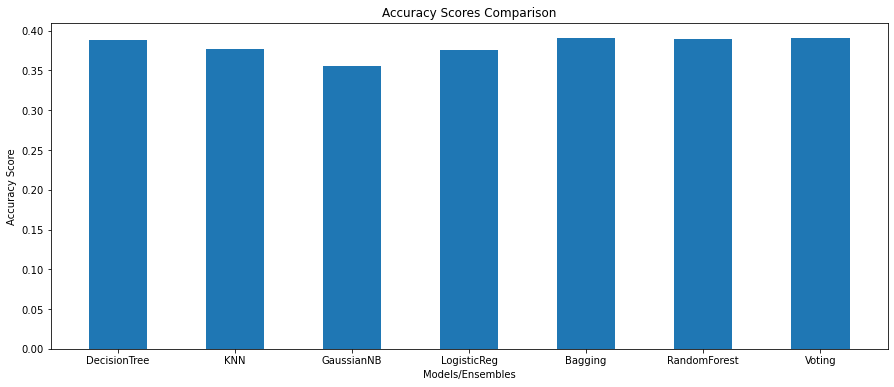

In [348]:
plt.figure(figsize=(15, 6))
plt.xlabel('Models/Ensembles')
plt.ylabel('Accuracy Score')
plt.title("Accuracy Scores Comparison")
plt.bar(accuracy_dict.keys(), accuracy_dict.values(), width=0.5)

Observations: 
- Bagging classifier get the highest accuracy, which is about 0.3906
- DecisionTree, Bagging classifier, Random Forest and Voting classifier have similar accuracy around 0.39, which is higher than the other three models
- Gaussian Naive Bayes model have the worst performance regarding the accuracy, which is 0.35

### Precision scores

Calculate and print out the precision score of each model/ensemble

In [349]:
# a dict storing the precision scores of each model/ensemble
precision_dict = dict() 

# loop through all the prediction results
for name, y_pred in prediction_results.items():
    # calculate the precision for this model/ensemble
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # store the precision into the dict
    precision_dict[name] = precision
    
    # print the result
    print("Model/Ensemble: {}, Precision Score: {}".format(name, precision))

Model/Ensemble: DecisionTree, Precision Score: 0.37975288557011794
Model/Ensemble: KNN, Precision Score: 0.3496519051928796
Model/Ensemble: GaussianNB, Precision Score: 0.30905087510731233
Model/Ensemble: LogisticReg, Precision Score: 0.305470711426821
Model/Ensemble: Bagging, Precision Score: 0.38589432254540457
Model/Ensemble: RandomForest, Precision Score: 0.3623264470322542
Model/Ensemble: Voting, Precision Score: 0.3842737897140498


D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\developTools\anaconda3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Show the precision score of each model/ensemble in a graph  

<BarContainer object of 7 artists>

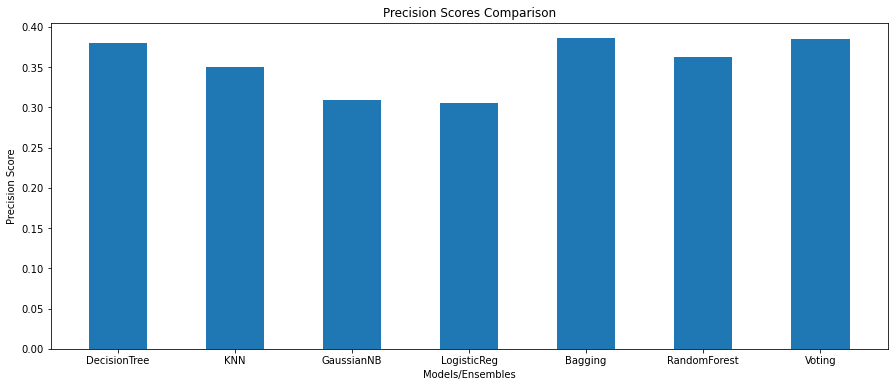

In [350]:
plt.figure(figsize=(15, 6))
plt.xlabel('Models/Ensembles')
plt.ylabel('Precision Score')
plt.title("Precision Scores Comparison")
plt.bar(precision_dict.keys(), precision_dict.values(), width=0.5)

Observations:
- Bagging classifier and Voting classifier have the highest precisions, which are around 0.385.
- The precision of decision tree model is a little bit lower than that of the highest two, which is about 0.380. But it is still much higher than the other models. 
- Gaussian Naive Bayes and Logistic Regression models have the lowest precisions, which are around 0.30

### Recall Scores

Calculate and print out the recall score of each model/ensemble

In [351]:
# a dict storing the recall scores of each model/ensemble
recall_dict = dict() 

# loop through all the prediction results
for name, y_pred in prediction_results.items():
    # calculate the recall for this model/ensemble
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # store the recall into the dict
    recall_dict[name] = recall
    
    # print the result
    print("Model/Ensemble: {}, Recall Score: {}".format(name, recall))

Model/Ensemble: DecisionTree, Recall Score: 0.38840388560901057
Model/Ensemble: KNN, Recall Score: 0.3766695976217393
Model/Ensemble: GaussianNB, Recall Score: 0.35531549637817694
Model/Ensemble: LogisticReg, Recall Score: 0.37538207092911274
Model/Ensemble: Bagging, Recall Score: 0.390612569610183
Model/Ensemble: RandomForest, Recall Score: 0.38959720303144496
Model/Ensemble: Voting, Recall Score: 0.3902147971360382


Show the recall score of each model/ensemble in a graph  

<BarContainer object of 7 artists>

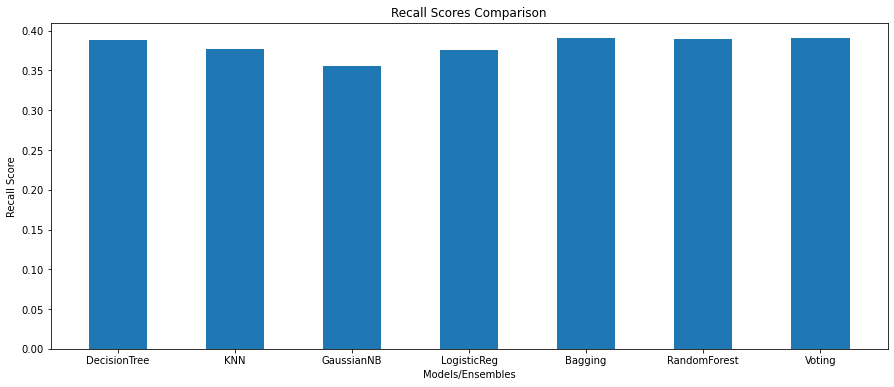

In [352]:
plt.figure(figsize=(15, 6))
plt.xlabel('Models/Ensembles')
plt.ylabel('Recall Score')
plt.title("Recall Scores Comparison")
plt.bar(recall_dict.keys(), recall_dict.values(), width=0.5)

Observations:
- In terms of recall, the bagging classifier performs the best, which reaches the score of 0.3906
- DecisionTree, Bagging classifier, Random Forest and Voting classifier have close recall scores around 0.39, which are higher than that of KNN, GaussianNB and Logistic Regression models.
- Regarding the recall scores, GaussianNB model has the worst performance in prediction, which is about 0.35

### F1 scores

Calculate and print out the f1 score of each model/ensemble

In [353]:
# a dict storing the f1 scores of each model/ensemble
f1_dict = dict() 

# loop through all the prediction results
for name, y_pred in prediction_results.items():
    # calculate the f1 for this model/ensemble
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # store the f1 into the dict
    f1_dict[name] = f1
    
    # print the result
    print("Model/Ensemble: {}, f1 Score: {}".format(name, f1))

Model/Ensemble: DecisionTree, f1 Score: 0.3470435418059233
Model/Ensemble: KNN, f1 Score: 0.34331219388885986
Model/Ensemble: GaussianNB, f1 Score: 0.30676413243398426
Model/Ensemble: LogisticReg, f1 Score: 0.32524559842916834
Model/Ensemble: Bagging, f1 Score: 0.34854148222565096
Model/Ensemble: RandomForest, f1 Score: 0.34581355427066995
Model/Ensemble: Voting, f1 Score: 0.34584356895265755


Show the f1 score of each model/ensemble in a graph  

<BarContainer object of 7 artists>

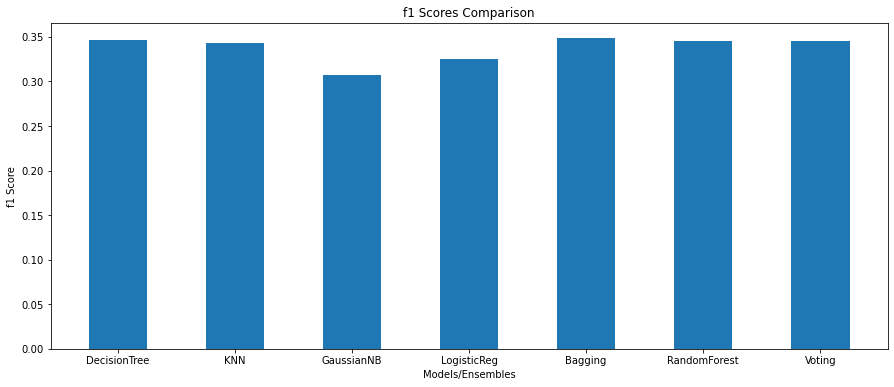

In [354]:
plt.figure(figsize=(15, 6))
plt.xlabel('Models/Ensembles')
plt.ylabel('f1 Score')
plt.title("f1 Scores Comparison")
plt.bar(f1_dict.keys(), f1_dict.values(), width=0.5)

Observations:
- Regarding the f1-score, 4 models/ensembles have the similar performance around 0.345, which are decision tree, KNN, Bagging classifier, Random forest and voting classifier.
- The performance of GaussianNB and Logistic regression are much lower than other 4 models/ensembles regarding the f1-score.

### Confusion Matrix

Show confusion matrix for each model/ensemble

In [355]:
# loop through all the prediction results
for name, y_pred in prediction_results.items():

    # print the confusion matrix for this model/ensemble
    print(name, ':')
    print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    print()

DecisionTree :
[[   22  3564  3406    28     0     7     0     0     0     0     0]
 [   12 11519 10308  1262     0   541     0     3     1     0     2]
 [    9  9227 16260   371     0   385     0     6    17     0    21]
 [    7  3731  6067  4308     0  2195     0    22    19     0    44]
 [    2  1149  1911   277     1   204     0     4     6     1    29]
 [    2  1001  1531  3590     1  4115     0    59    91     2   126]
 [    0   173   383    81     0   123     1     6     2     0    28]
 [    0   260   302  1067     1  1114     1    75    26     1   222]
 [    0    66    75   174     0   831     0    18   124     0   116]
 [    0    66    92   270     0   301     0    18     3     5    99]
 [    1   100   137   205     0   641     1    88    82    12   675]]

KNN :
[[  269  3662  3025    50     1    19     0     1     0     0     0]
 [  389 11809  9523  1259     7   638     1     6     9     1     6]
 [  351 10094 14814   598     4   359     1    10    45     2    18]
 [  164  41

When observing these confusion matrixes, we can regard the numbers on the diagonal lines (from left top to right bottom) are the number of correct predictions of each class (level) in the target feature. As can be seen from the matrixes above, generally, numbers on the right half of the diagonal lines are relative **smaller than** numbers on the left half, which means our models/ensembles have a **lower** performance when predicting the Stay of "61-70", "71-80", "81-90" and "91-100". This might be attributed to the **unbalance** of the data in our target feature, which was shown in a **figure** called "Data Distribution in Target Feature" above. 

From the confusion matrixes above, it is apparent that, the **Logistic regression model** was affected the most by the unbalance data distribution, because it got all 0s in the right half of its diagonal lines (except the last number). On the other hand, **DecisionTree**, **KNN** and **Bagging Classifier** were relatively less affected by the unbalance data distribution when comparing with the other models/ensembles. 

### ROC index

Calculate and print out the ROC index of each model/ensemble

In [366]:
# a dict storing the roc index of each model/ensemble
roc_index_dict = dict() 

# loop through all the prediction results
for name, y_pred in prediction_results.items():
    if not name == 'Voting':
        # calculate the probability of this prediction
        if name == 'LogisticReg':
            proba = models_and_ensembles[name].predict_proba(X_test_onehot)
        else:
            proba = models_and_ensembles[name].predict_proba(X_test)

        # calculate the roc index for this model/ensemble
        roc_index = roc_auc_score(y_true=y_test, y_score=proba, multi_class='ovo')

        # store the roc index into the dict
        roc_index_dict[name] = roc_index

        # print the result
        print("Model/Ensemble: {}, ROC Index: {}".format(name, roc_index))

Model/Ensemble: DecisionTree, ROC Index: 0.7451113172186131
Model/Ensemble: KNN, ROC Index: 0.7051224683284456
Model/Ensemble: GaussianNB, ROC Index: 0.695208231360775
Model/Ensemble: LogisticReg, ROC Index: 0.7129562262564043
Model/Ensemble: Bagging, ROC Index: 0.7491257202007665
Model/Ensemble: RandomForest, ROC Index: 0.747321389391943


Show the ROC index of each model/ensemble in a graph  

<BarContainer object of 6 artists>

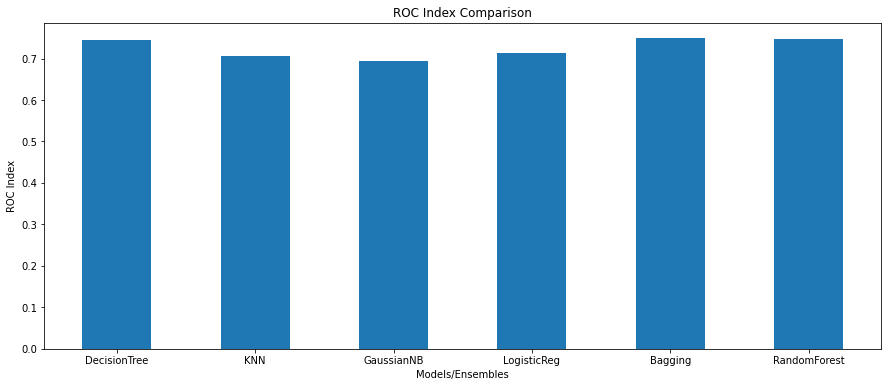

In [367]:
plt.figure(figsize=(15, 6))
plt.xlabel('Models/Ensembles')
plt.ylabel('ROC Index')
plt.title("ROC Index Comparison")
plt.bar(roc_index_dict.keys(), roc_index_dict.values(), width=0.5)

Observations:
- Bagging classifier has the highest roc index, which is about 0.749
- The roc indexes of decision tree and random forest are quite close to that of Bagging classifier (0.749), which are 0.745 and 0.747 respectively.
- KNN, GaussianNB and Logistic regression models have the relative lower performance than other 3 models/ensembles when roc index is taking into account. 
- GaussianNB model has the lowest roc index that is about 0.69

### Conclusion
In conclusion, although the **Gaussian Naive Bayes model** has a high efficiency in both the time consumption of training and predicting, it presented the lowest performance regarding all the other evaluation metrics we have used. Therefore, Gaussian Naive Bayes model may not be the one well fit our prediction. 

On the other hand, in terms of the prediction performance (accuracy, precision, recall, f1-score, roc), the **decision tree model**, **Bagging classifier**, and **voting classifier** usually show a performance that obviously higher than other modes/ensemble. Moreover, after calculating the confusion matrix of them, we found the **decision tree model** and **Bagging classifier** are also slightly less affected by the unbalanced data distribution than other models/ensembles. Therefore, after comparing the prediction performance, the following models can be regarded as the best ones for our prediction:
- **Decision tree model** - criterion=entropy, max_depth=9, {80% training, 20% validation}
- **Bagging classifier** - n_estimators=10, Base model: decision tree - criterion=entropy, max_depth=9, {80% training, 20% validation}
- **voting classifier** (using following base models)
    - Decision tree - criterion=entropy, max_depth=9, {80% training, 20% validation}
    - Random forest - n_estimators=200, max_depth=10, {90% training, 10% validation}
    - Logistic Regression - max_iter=1000, solver='lbfgs', {80% training and 20% validation} 

Nevertheless, if we take the time efficiency of training and predicting into account, the performance of **decision tree model** and **bagging classifier** would be much better than **voting classifier**, as they consume much less time. Especially, the **decision tree model** is the one with the highest time efficiency among these tree models/ensembles.